In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
mydata = pd.read_csv(r"C:\Users\Keara\Downloads\Intro_Data_Mining\practise_data.csv" , sep = ',')

In [3]:
mydata.head(20)

,Customer_ID,rev_Mean,mou_Mean,uniqsubs,ethnic,creditcd,churn
0,1000001,23.9975,219.25,2,N,Y,1
1,1000002,57.4925,482.75,1,Z,Y,0
2,1000003,16.9900,10.25,1,N,Y,1
3,1000004,38.0000,7.50,1,U,Y,0
4,1000005,55.2300,570.50,1,I,Y,0
5,1000006,82.2750,1312.25,2,U,Y,0
6,1000007,17.1450,0.00,2,N,Y,1
7,1000008,38.0525,682.50,1,S,Y,0
8,1000009,97.3375,1039.00,1,F,N,0
9,1000010,31.6625,25.50,2,N,Y,0


In [4]:
mydata.describe()

,Customer_ID,rev_Mean,mou_Mean,uniqsubs,churn
count,1.000000e+03,997.000000,997.000000,1000.000000,1000.000000
mean,1.000500e+06,78.721991,753.542711,1.684000,0.498000
std,2.888194e+02,58.683565,787.110771,1.051308,0.500246
min,1.000001e+06,4.750000,0.000000,1.000000,0.000000
25%,1.000251e+06,38.535000,155.750000,1.000000,0.000000
50%,1.000500e+06,66.460000,514.500000,1.000000,0.000000
75%,1.000750e+06,97.337500,1107.250000,2.000000,1.000000
max,1.001000e+06,559.790000,6336.250000,7.000000,1.000000


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  1000 non-null   int64  
 1   rev_Mean     997 non-null    float64
 2   mou_Mean     997 non-null    float64
 3   uniqsubs     1000 non-null   int64  
 4   ethnic       979 non-null    object 
 5   creditcd     979 non-null    object 
 6   churn        1000 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [6]:
df = mydata.iloc[:, 1:mydata.shape[1]] #remove customer id

In [7]:
#handling missing values: Alternative 1
#determine the numerical features
#list down numerical features
num_vars=list(df.loc[:,df.dtypes!='object'].columns[0:-1]) #churn column is discarded
len(num_vars)

df[num_vars].isnull().sum()

rev_Mean    3
mou_Mean    3
uniqsubs    0
dtype: int64

In [8]:
#fill the numerical missing values with mean
for var in num_vars:
    df[var] = df[var].fillna(df[var].mean())

df[num_vars].isnull().sum()

rev_Mean    0
mou_Mean    0
uniqsubs    0
dtype: int64

In [9]:
#missing value handling in categorical variables: Alternative 1
#histogram of categorical variables according to churn information
cat_vars=list(df.loc[:,df.dtypes=='object'].columns)
len(cat_vars) 

df[cat_vars].isnull().sum()

ethnic      21
creditcd    21
dtype: int64

In [10]:
#missing value handling in categorical variables: Alternative 2
myimputer2 = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

myimputer2 = myimputer2.fit(df[cat_vars])
df[cat_vars] = myimputer2.transform(df[cat_vars])
df[cat_vars].isnull().sum()

ethnic      0
creditcd    0
dtype: int64

In [11]:
#standardization
myscaler = StandardScaler()
myscaler = myscaler.fit(df[num_vars])
df[num_vars] = myscaler.transform(df[num_vars])

In [12]:
#prepare the data for clustering
#encoding
df = pd.get_dummies(df, prefix=cat_vars)

n_clust = 5

kmeans = KMeans(n_clusters=n_clust, max_iter = 20, init = 'random', 
                n_init = 10, verbose=1) #k-means object is created

cluster_df = df.drop(['churn'], axis=1)
kmeans.fit(cluster_df)

Initialization complete
Iteration 0, inertia 3930.6236252663657
Iteration 1, inertia 2401.9713193817934
Iteration 2, inertia 2091.6063652814055
Iteration 3, inertia 1992.2045222832312
Iteration 4, inertia 1964.4962293150109
Iteration 5, inertia 1958.058675822546
Iteration 6, inertia 1952.3136284465388
Iteration 7, inertia 1949.7348512127355
Iteration 8, inertia 1947.3710729453053
Iteration 9, inertia 1944.1675041863027
Iteration 10, inertia 1943.3547455461496
Iteration 11, inertia 1942.4023801182752
Iteration 12, inertia 1940.9857662205227
Iteration 13, inertia 1939.8572421677263
Iteration 14, inertia 1939.5804130658644
Iteration 15, inertia 1939.5443152965372
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 4796.737283382036
Iteration 1, inertia 2963.497604231784
Iteration 2, inertia 2434.306131119567
Iteration 3, inertia 2260.0118856588524
Iteration 4, inertia 2212.187081287113
Iteration 5, inertia 2192.6812945999927
Iteration 6, inertia 218

KMeans(init='random', max_iter=20, n_clusters=5, verbose=1)

In [13]:
mycenters = kmeans.cluster_centers_ #display the centroids obtained after clustering

print(mycenters)

[[ 2.94388001e+00  2.60646528e+00  2.30234050e-01 -4.33680869e-19
   1.85185185e-02  5.55555556e-02  5.55555556e-02  1.48148148e-01
   1.85185185e-02  5.55555556e-02 -8.67361738e-19  2.40740741e-01
  -3.46944695e-18  3.70370370e-02  1.29629630e-01  1.48148148e-01
   9.25925926e-02  4.25925926e-01  5.74074074e-01]
 [ 5.64627133e-01  8.06780329e-01 -2.34587067e-01 -1.30104261e-18
   1.33928571e-02  4.01785714e-02  7.58928571e-02  1.51785714e-01
   5.35714286e-02  3.57142857e-02 -2.60208521e-18  3.75000000e-01
   1.78571429e-02  1.33928571e-02  1.07142857e-01  9.37500000e-02
   2.23214286e-02  1.02678571e-01  8.97321429e-01]
 [-5.25039496e-01 -5.76551348e-01 -4.00279902e-01  2.23214286e-03
   8.92857143e-03  2.67857143e-02  7.81250000e-02  9.15178571e-02
   5.80357143e-02  4.01785714e-02  2.23214286e-03  3.95089286e-01
   1.78571429e-02  1.33928571e-02  1.20535714e-01  9.82142857e-02
   4.68750000e-02  1.94289029e-16  1.00000000e+00]
 [-3.07064251e-01 -3.73337144e-01 -3.73964355e-01 -1.30

In [14]:
labels = kmeans.fit_predict(cluster_df) #cluster labels for plotting 

my_silhouette = silhouette_score(cluster_df, labels, metric='euclidean')

print(my_silhouette)

Initialization complete
Iteration 0, inertia 3761.697389523643
Iteration 1, inertia 2227.3368452142327
Iteration 2, inertia 2172.221206347742
Iteration 3, inertia 2088.7066749257297
Iteration 4, inertia 2005.535709035
Iteration 5, inertia 1950.530440583183
Iteration 6, inertia 1942.484281674838
Iteration 7, inertia 1939.269977421305
Iteration 8, inertia 1938.9215130447028
Iteration 9, inertia 1938.8746333604358
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 3692.3041791112914
Iteration 1, inertia 2417.0425392434304
Iteration 2, inertia 2237.7898836647887
Iteration 3, inertia 2119.708489816788
Iteration 4, inertia 2056.8786517460344
Iteration 5, inertia 2002.6637842103503
Iteration 6, inertia 1952.8033005953757
Iteration 7, inertia 1943.950552205906
Iteration 8, inertia 1943.2680270439746
Iteration 9, inertia 1942.3169955737123
Iteration 10, inertia 1940.9924659452536
Iteration 11, inertia 1940.0496104141532
Iteration 12, inertia 1939.67328387

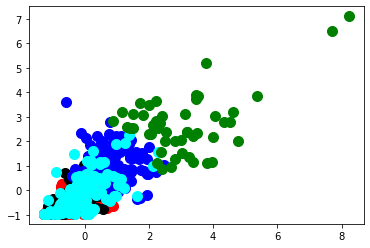

In [15]:
#show the data points and their cluster labels on the first two features
plt.scatter(cluster_df.iloc[labels ==0,0], cluster_df.iloc[labels == 0,1], s=100, c='red')
plt.scatter(cluster_df.iloc[labels ==1,0], cluster_df.iloc[labels == 1,1], s=100, c='black')
plt.scatter(cluster_df.iloc[labels ==2,0], cluster_df.iloc[labels == 2,1], s=100, c='blue')
plt.scatter(cluster_df.iloc[labels ==3,0], cluster_df.iloc[labels == 3,1], s=100, c='cyan')
plt.scatter(cluster_df.iloc[labels ==4,0], cluster_df.iloc[labels == 4,1], s=100, c='green')

array([<AxesSubplot:title={'center':'rev_Mean'}>,
       <AxesSubplot:title={'center':'mou_Mean'}>,
       <AxesSubplot:title={'center':'uniqsubs'}>], dtype=object)

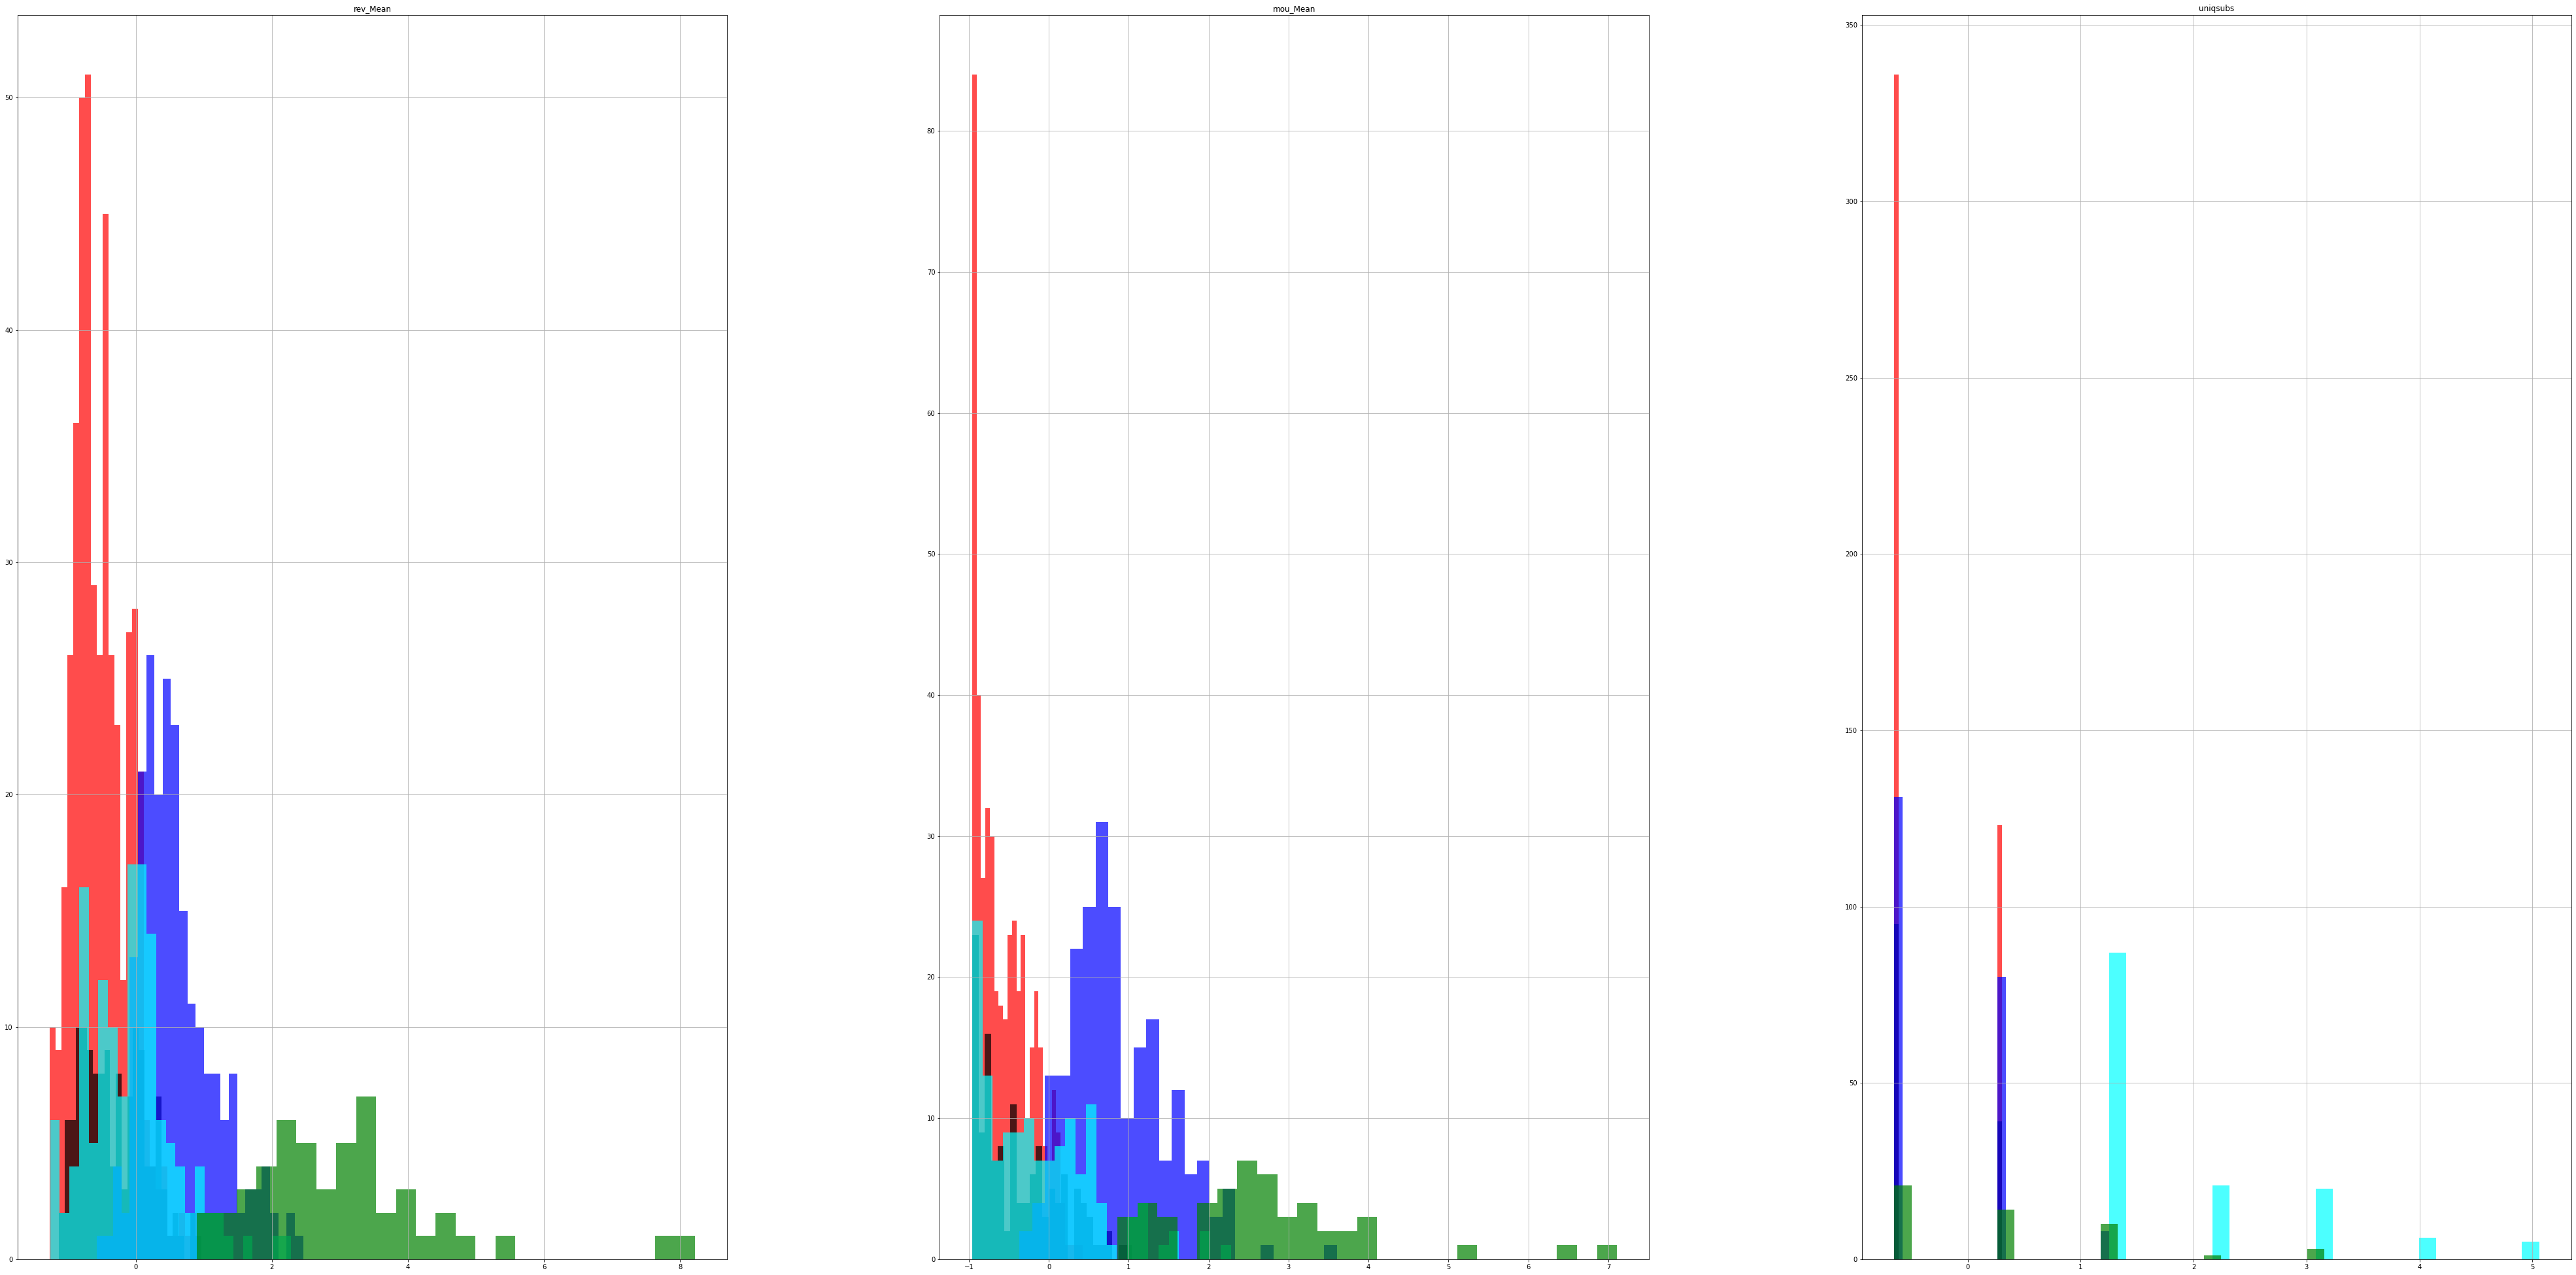

In [16]:
#display yhe histogram of three numerical variables for each cluster
fig, ax = plt.subplots(1, 3, figsize=(70, 35))
df.loc[labels == 0][num_vars[0:]].hist(bins=25, color="red", alpha=0.7, ax=ax)
df.loc[labels == 1][num_vars[0:]].hist(bins=25, color="black", alpha=0.7, ax=ax)
df.loc[labels == 2][num_vars[0:]].hist(bins=25, color="blue", alpha=0.7, ax=ax)
df.loc[labels == 3][num_vars[0:]].hist(bins=25, color="cyan", alpha=0.7, ax=ax)
df.loc[labels == 4][num_vars[0:]].hist(bins=25, color="green", alpha=0.7, ax=ax)

In [17]:
#number of points in each cluster
for i in range(n_clust):
    print((df.loc[labels == i]).shape[0])

459
134
219
139
49


In [18]:
#distribution of churn customers in each cluster
for i in range(n_clust):
    print(sum(df.loc[labels == i]['churn']) / (df.loc[labels == i]).shape[0])

0.5490196078431373
0.4626865671641791
0.3926940639269406
0.5755395683453237
0.3673469387755102


array([<AxesSubplot:title={'center':'rev_Mean'}>,
       <AxesSubplot:title={'center':'mou_Mean'}>,
       <AxesSubplot:title={'center':'uniqsubs'}>], dtype=object)

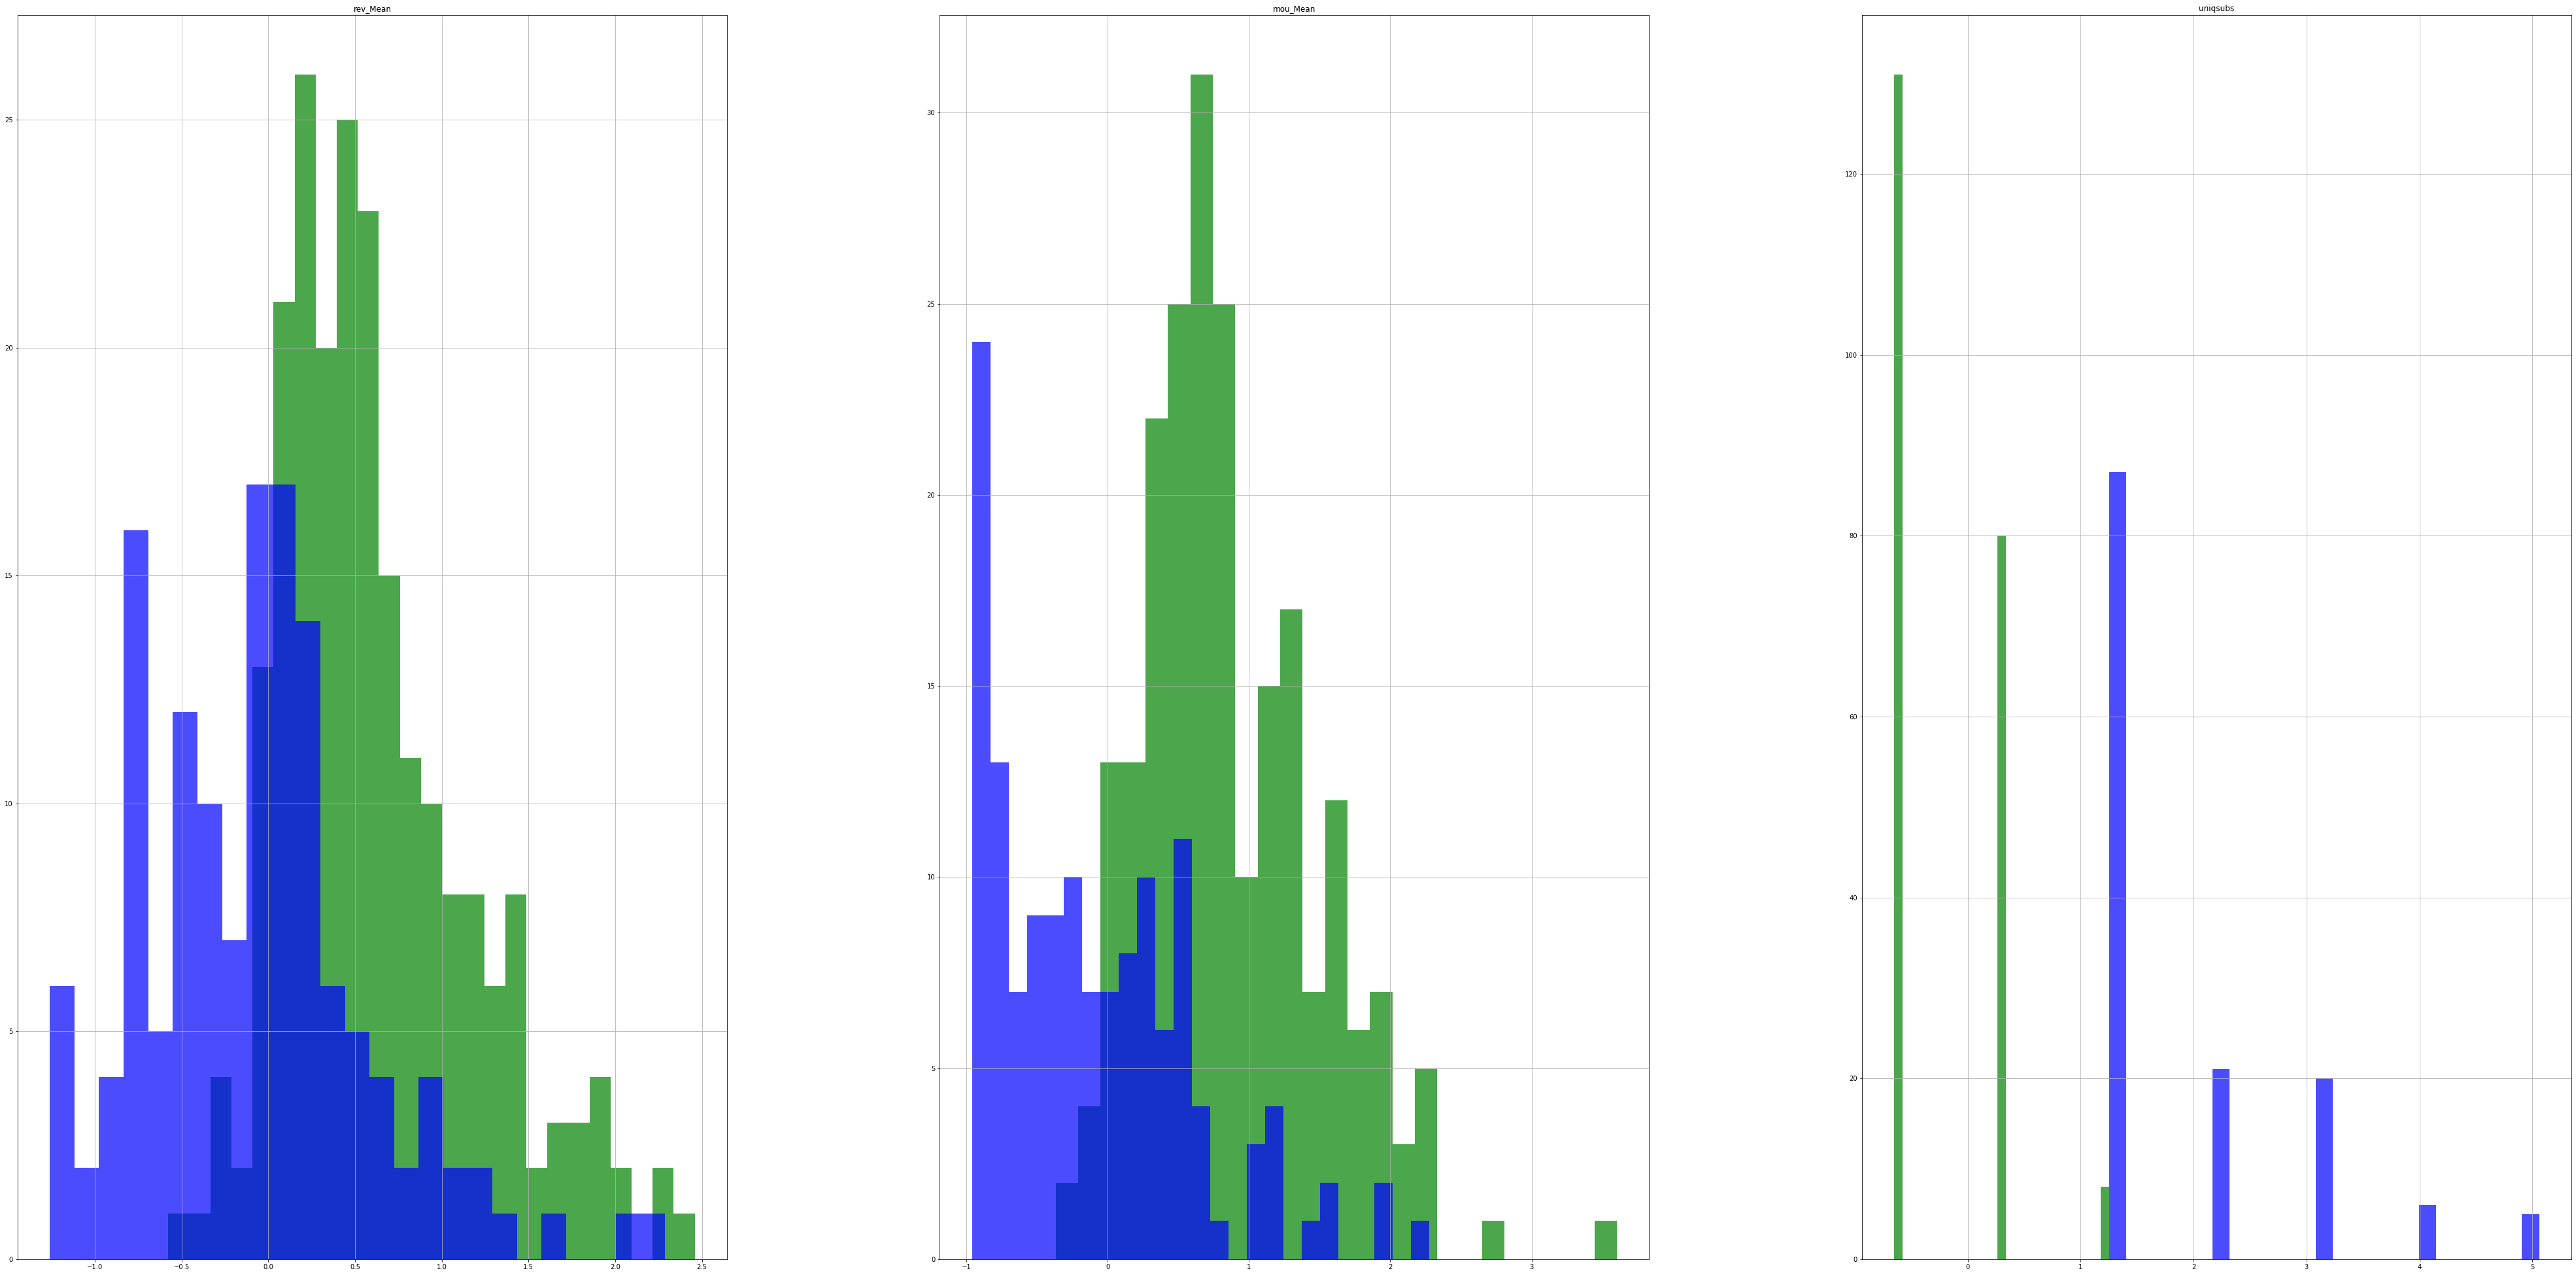

In [19]:
#displaying clusters 1 and 2 which have almost same number of data points
fig, ax = plt.subplots(1, 3, figsize=(70, 35))
df.loc[labels == 2][num_vars[0:]].hist(bins=25, color="green", alpha=0.7, ax=ax)
df.loc[labels == 3][num_vars[0:]].hist(bins=25, color="blue", alpha=0.7, ax=ax)

In [20]:
max_clust = 50
ss_errors = np.zeros(max_clust-1)
silhouettes_kmeans = np.zeros(max_clust-1)
for i in range(2, max_clust+1):
    #Sum of squared distances of samples to their closest cluster center.
    kmeans = KMeans(n_clusters=i, max_iter = 25, init = 'random', 
                n_init = i, verbose=1) #k-means object is created

    labels = kmeans.fit_predict(cluster_df)
    ss_errors[i-2] = kmeans.inertia_
    silhouettes_kmeans[i-2] = silhouette_score(cluster_df, labels, metric='euclidean')

Initialization complete
Iteration 0, inertia 5825.893056013525
Iteration 1, inertia 3059.233014946335
Iteration 2, inertia 3042.2161673773567
Iteration 3, inertia 3036.8067969276367
Iteration 4, inertia 3034.5796456846706
Iteration 5, inertia 3034.2860764145066
Iteration 6, inertia 3034.11653161256
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5360.652025617682
Iteration 1, inertia 3076.722723715254
Iteration 2, inertia 3051.444020454306
Iteration 3, inertia 3047.0618237076724
Iteration 4, inertia 3045.3842310444156
Iteration 5, inertia 3043.389270000835
Iteration 6, inertia 3041.380037314313
Iteration 7, inertia 3039.19513347019
Iteration 8, inertia 3038.529158655769
Iteration 9, inertia 3038.3505564240627
Iteration 10, inertia 3038.2713677798406
Iteration 11, inertia 3038.250911392426
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 4376.679008574035
Iteration 1, inertia 3259.3691495187754
Iterati

Iteration 8, inertia 1997.3980300948267
Iteration 9, inertia 1989.1916526030825
Iteration 10, inertia 1983.3222511222
Iteration 11, inertia 1980.169617595563
Iteration 12, inertia 1978.229469484436
Iteration 13, inertia 1976.3804688930452
Iteration 14, inertia 1975.5185885746214
Iteration 15, inertia 1975.498002197011
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3381.8541464660093
Iteration 1, inertia 2501.92629348926
Iteration 2, inertia 2372.5823183000384
Iteration 3, inertia 2283.671713252425
Iteration 4, inertia 2226.017826475689
Iteration 5, inertia 2183.729766114014
Iteration 6, inertia 2112.2072506627633
Iteration 7, inertia 2040.4215347971879
Iteration 8, inertia 1979.5594495427194
Iteration 9, inertia 1961.8522258121216
Iteration 10, inertia 1955.2443633363343
Iteration 11, inertia 1950.6090502801746
Iteration 12, inertia 1948.7932763146462
Iteration 13, inertia 1945.329117290881
Iteration 14, inertia 1943.6996700977686
Iteration 

Iteration 0, inertia 3125.4993489789845
Iteration 1, inertia 2025.7604172241108
Iteration 2, inertia 1803.5054528473038
Iteration 3, inertia 1734.1785650414724
Iteration 4, inertia 1710.8632148560189
Iteration 5, inertia 1698.8601753884532
Iteration 6, inertia 1686.7545860178254
Iteration 7, inertia 1672.189799598361
Iteration 8, inertia 1665.8702156878185
Iteration 9, inertia 1661.5217548485982
Iteration 10, inertia 1660.2569097538467
Iteration 11, inertia 1659.8888405344994
Iteration 12, inertia 1658.9601986832133
Iteration 13, inertia 1658.5423430919943
Iteration 14, inertia 1658.4149284186042
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2962.443070056552
Iteration 1, inertia 1993.616327231606
Iteration 2, inertia 1882.4087281845507
Iteration 3, inertia 1840.0348138639674
Iteration 4, inertia 1797.695295969898
Iteration 5, inertia 1729.4771810509174
Iteration 6, inertia 1701.678159433584
Iteration 7, inertia 1698.7948798342513
Iteration

Iteration 8, inertia 1635.7638776094884
Iteration 9, inertia 1634.6560401028153
Iteration 10, inertia 1634.3478954377802
Iteration 11, inertia 1634.3047776741596
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2980.0511014075296
Iteration 1, inertia 1834.798228656563
Iteration 2, inertia 1688.84576651983
Iteration 3, inertia 1656.6504822854045
Iteration 4, inertia 1630.421950043879
Iteration 5, inertia 1616.79515131526
Iteration 6, inertia 1607.2167450470988
Iteration 7, inertia 1599.4817082459513
Iteration 8, inertia 1596.5076538245296
Iteration 9, inertia 1593.7475347207999
Iteration 10, inertia 1591.5946578923583
Iteration 11, inertia 1590.58315401102
Iteration 12, inertia 1590.3966639038595
Iteration 13, inertia 1590.3420968696328
Iteration 14, inertia 1590.2934904185688
Iteration 15, inertia 1590.253775798618
Iteration 16, inertia 1590.2402274551657
Iteration 17, inertia 1590.2324276127883
Converged at iteration 17: strict convergence.
I

Iteration 0, inertia 2694.5794703659867
Iteration 1, inertia 1810.0319965960764
Iteration 2, inertia 1723.1447031572002
Iteration 3, inertia 1667.4538003247465
Iteration 4, inertia 1639.4807280568602
Iteration 5, inertia 1613.3848822631128
Iteration 6, inertia 1578.0053683560764
Iteration 7, inertia 1568.0743588578166
Iteration 8, inertia 1565.297858738477
Iteration 9, inertia 1563.396157204238
Iteration 10, inertia 1559.2383659669167
Iteration 11, inertia 1557.264408359165
Iteration 12, inertia 1555.023345566782
Iteration 13, inertia 1553.9945299906333
Iteration 14, inertia 1552.5362244929463
Iteration 15, inertia 1551.2643774311325
Iteration 16, inertia 1550.2146586819724
Iteration 17, inertia 1549.31124917895
Iteration 18, inertia 1548.8377716813643
Iteration 19, inertia 1548.1589000275267
Iteration 20, inertia 1547.8004300825285
Iteration 21, inertia 1547.4592825659481
Iteration 22, inertia 1547.3583659296733
Converged at iteration 22: strict convergence.
Initialization complete
It

Iteration 11, inertia 1454.7412227630036
Iteration 12, inertia 1449.9525363820644
Iteration 13, inertia 1446.6907257889304
Iteration 14, inertia 1442.363324944225
Iteration 15, inertia 1437.3896277597407
Iteration 16, inertia 1435.7990671789514
Iteration 17, inertia 1435.4805395357564
Iteration 18, inertia 1434.8738212941653
Iteration 19, inertia 1434.357757188583
Iteration 20, inertia 1433.5152353221263
Iteration 21, inertia 1432.320479673465
Iteration 22, inertia 1431.3732518864338
Iteration 23, inertia 1431.092518416681
Iteration 24, inertia 1430.762991189394
Initialization complete
Iteration 0, inertia 3875.1242739258446
Iteration 1, inertia 2151.767125046045
Iteration 2, inertia 1878.8376703768533
Iteration 3, inertia 1749.2893322869616
Iteration 4, inertia 1660.1922776457436
Iteration 5, inertia 1606.1527024654858
Iteration 6, inertia 1574.0811947362906
Iteration 7, inertia 1545.9896169774463
Iteration 8, inertia 1524.6532486558676
Iteration 9, inertia 1499.1950495391973
Iteratio

Iteration 0, inertia 3092.529450356015
Iteration 1, inertia 1949.7246212395444
Iteration 2, inertia 1579.5883775708485
Iteration 3, inertia 1463.6961658660207
Iteration 4, inertia 1427.5336139465292
Iteration 5, inertia 1409.724712015051
Iteration 6, inertia 1399.4486058755574
Iteration 7, inertia 1393.7462697486787
Iteration 8, inertia 1389.9879426413645
Iteration 9, inertia 1386.0471908435395
Iteration 10, inertia 1380.4302311549916
Iteration 11, inertia 1377.281864459391
Iteration 12, inertia 1374.3288216267315
Iteration 13, inertia 1372.8809029318231
Iteration 14, inertia 1372.0215607914708
Iteration 15, inertia 1370.7636199636506
Iteration 16, inertia 1370.6198825750535
Iteration 17, inertia 1370.5793005996527
Iteration 18, inertia 1370.3949791460084
Iteration 19, inertia 1370.2262239428935
Iteration 20, inertia 1370.186896949865
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 2813.3401324436727
Iteration 1, inertia 1829.3218502147436
It

Iteration 20, inertia 1278.5037827731426
Iteration 21, inertia 1278.194951582939
Iteration 22, inertia 1278.1831133244714
Iteration 23, inertia 1278.1639325560027
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 2349.795762998551
Iteration 1, inertia 1608.5134620898605
Iteration 2, inertia 1508.3707131859735
Iteration 3, inertia 1449.9716702483654
Iteration 4, inertia 1385.2718737902856
Iteration 5, inertia 1364.124079575678
Iteration 6, inertia 1358.6303136978147
Iteration 7, inertia 1352.8302381154685
Iteration 8, inertia 1351.452583784097
Iteration 9, inertia 1351.0102114166507
Iteration 10, inertia 1350.9534766441625
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2364.2038990495007
Iteration 1, inertia 1694.1757004960193
Iteration 2, inertia 1530.508836664938
Iteration 3, inertia 1466.8675305600343
Iteration 4, inertia 1429.0618567227862
Iteration 5, inertia 1405.4345981051838
Iteration 6, inert

Iteration 18, inertia 1278.5399759621464
Iteration 19, inertia 1278.3193167818365
Iteration 20, inertia 1278.1136061047657
Iteration 21, inertia 1278.0556888323956
Iteration 22, inertia 1277.8746757282547
Iteration 23, inertia 1277.116371309964
Iteration 24, inertia 1276.6902692089313
Initialization complete
Iteration 0, inertia 2351.5426108389775
Iteration 1, inertia 1560.978220709752
Iteration 2, inertia 1427.2407073303796
Iteration 3, inertia 1391.6715910658763
Iteration 4, inertia 1372.7525402454837
Iteration 5, inertia 1355.538412437648
Iteration 6, inertia 1341.349152737563
Iteration 7, inertia 1329.4367183125967
Iteration 8, inertia 1316.3412988322093
Iteration 9, inertia 1302.5982138185202
Iteration 10, inertia 1296.2313253663635
Iteration 11, inertia 1293.4457451522328
Iteration 12, inertia 1291.7541532417279
Iteration 13, inertia 1289.074909714391
Iteration 14, inertia 1279.8599439472086
Iteration 15, inertia 1278.1022493822697
Iteration 16, inertia 1277.1955821466302
Iterati

Iteration 0, inertia 2021.6567739689096
Iteration 1, inertia 1403.8261279388364
Iteration 2, inertia 1322.391159287734
Iteration 3, inertia 1309.293505528789
Iteration 4, inertia 1302.2624582061335
Iteration 5, inertia 1297.3308861313387
Iteration 6, inertia 1292.0016119612847
Iteration 7, inertia 1288.327474568485
Iteration 8, inertia 1286.867264470226
Iteration 9, inertia 1284.5503716405512
Iteration 10, inertia 1283.1357219383513
Iteration 11, inertia 1282.0461481260031
Iteration 12, inertia 1280.4776798317434
Iteration 13, inertia 1279.5010863315922
Iteration 14, inertia 1278.9488744998278
Iteration 15, inertia 1278.5677642369037
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 2349.6628037220157
Iteration 1, inertia 1574.8759344851128
Iteration 2, inertia 1447.686925421646
Iteration 3, inertia 1366.196192005109
Iteration 4, inertia 1329.5639101721745
Iteration 5, inertia 1318.1156747639848
Iteration 6, inertia 1312.519397829638
Iteration 

Initialization complete
Iteration 0, inertia 2175.299702135652
Iteration 1, inertia 1473.1231238181024
Iteration 2, inertia 1372.3022296462143
Iteration 3, inertia 1343.3859642635657
Iteration 4, inertia 1329.9343254045355
Iteration 5, inertia 1315.9096480586727
Iteration 6, inertia 1304.380881506844
Iteration 7, inertia 1289.7672725297357
Iteration 8, inertia 1281.3439539094072
Iteration 9, inertia 1275.4475186755283
Iteration 10, inertia 1269.4285773208924
Iteration 11, inertia 1266.8491409553287
Iteration 12, inertia 1261.3385096769255
Iteration 13, inertia 1259.5840985872485
Iteration 14, inertia 1258.6787357755372
Iteration 15, inertia 1258.025517334973
Iteration 16, inertia 1256.1333499491302
Iteration 17, inertia 1253.9852593733135
Iteration 18, inertia 1253.0264589553333
Iteration 19, inertia 1252.3553829637835
Iteration 20, inertia 1251.9586132957818
Iteration 21, inertia 1251.8535160605188
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, ine

Iteration 9, inertia 1270.858402265826
Iteration 10, inertia 1268.0136179850854
Iteration 11, inertia 1265.681283500291
Iteration 12, inertia 1263.0906789214123
Iteration 13, inertia 1261.1133679757181
Iteration 14, inertia 1259.9942912042927
Iteration 15, inertia 1257.3549109713958
Iteration 16, inertia 1256.2419676246923
Iteration 17, inertia 1255.8536751137126
Iteration 18, inertia 1255.395923570586
Iteration 19, inertia 1255.1225999058981
Iteration 20, inertia 1254.3894414036367
Iteration 21, inertia 1253.5721263617997
Iteration 22, inertia 1253.1868249178106
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 2068.5602716587023
Iteration 1, inertia 1492.384855544593
Iteration 2, inertia 1359.431358926841
Iteration 3, inertia 1296.7114277282665
Iteration 4, inertia 1266.9090928150806
Iteration 5, inertia 1250.6419105787243
Iteration 6, inertia 1244.806597161314
Iteration 7, inertia 1237.3630962173131
Iteration 8, inertia 1231.5037401399998
It

Iteration 22, inertia 1214.8913253839519
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 2286.4750544305953
Iteration 1, inertia 1376.086126914148
Iteration 2, inertia 1241.0920855928773
Iteration 3, inertia 1200.6367607204954
Iteration 4, inertia 1183.3530089275073
Iteration 5, inertia 1173.8086367276107
Iteration 6, inertia 1164.8928244018982
Iteration 7, inertia 1163.6548124614746
Iteration 8, inertia 1162.9172183381722
Iteration 9, inertia 1162.4980985985808
Iteration 10, inertia 1162.2766734368538
Iteration 11, inertia 1161.8265765845463
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 2356.6055312649673
Iteration 1, inertia 1588.5207377967583
Iteration 2, inertia 1403.125571513375
Iteration 3, inertia 1332.0960409806853
Iteration 4, inertia 1291.2055231011636
Iteration 5, inertia 1266.8063174028048
Iteration 6, inertia 1260.7188658716066
Iteration 7, inertia 1253.4801158123837
Iteration 8, iner

Iteration 20, inertia 1129.8147314127266
Iteration 21, inertia 1129.733169711135
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 1964.5332855103193
Iteration 1, inertia 1393.7353111974453
Iteration 2, inertia 1327.4613895906627
Iteration 3, inertia 1291.2144806656052
Iteration 4, inertia 1264.501817700842
Iteration 5, inertia 1239.376524558408
Iteration 6, inertia 1217.7057223312158
Iteration 7, inertia 1208.1815540091122
Iteration 8, inertia 1197.7429310451748
Iteration 9, inertia 1183.3048650243427
Iteration 10, inertia 1173.2582308721314
Iteration 11, inertia 1170.460060546497
Iteration 12, inertia 1169.0568409384937
Iteration 13, inertia 1168.2376625928744
Iteration 14, inertia 1166.269942519722
Iteration 15, inertia 1165.0658099603224
Iteration 16, inertia 1164.5488565322169
Iteration 17, inertia 1164.233832011218
Iteration 18, inertia 1163.7971439140083
Iteration 19, inertia 1163.6128871970486
Iteration 20, inertia 1163.4771735906618
It

Iteration 0, inertia 2279.7195156097573
Iteration 1, inertia 1535.099423756653
Iteration 2, inertia 1358.8764676120884
Iteration 3, inertia 1306.2984058637692
Iteration 4, inertia 1271.2279186106975
Iteration 5, inertia 1249.8081759014983
Iteration 6, inertia 1231.884433757759
Iteration 7, inertia 1222.645456139537
Iteration 8, inertia 1213.6833264561287
Iteration 9, inertia 1210.1517718608536
Iteration 10, inertia 1206.242315971002
Iteration 11, inertia 1201.0301689925448
Iteration 12, inertia 1199.6751471341165
Iteration 13, inertia 1199.059884580206
Iteration 14, inertia 1199.0474863879326
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2393.7051923657154
Iteration 1, inertia 1623.5357853420335
Iteration 2, inertia 1388.6881606490201
Iteration 3, inertia 1302.8789449250612
Iteration 4, inertia 1258.4391826819194
Iteration 5, inertia 1220.6193919037676
Iteration 6, inertia 1197.407348311907
Iteration 7, inertia 1185.1027307243621
Iteration 

Initialization complete
Iteration 0, inertia 1996.3000195260893
Iteration 1, inertia 1323.8631220878285
Iteration 2, inertia 1216.8206995674295
Iteration 3, inertia 1182.7458516353713
Iteration 4, inertia 1169.2808871918257
Iteration 5, inertia 1160.9559050868318
Iteration 6, inertia 1159.0598658465713
Iteration 7, inertia 1157.8015540782433
Iteration 8, inertia 1156.7794322480747
Iteration 9, inertia 1152.1684864930128
Iteration 10, inertia 1149.0325640250107
Iteration 11, inertia 1148.3296246451864
Iteration 12, inertia 1148.0438971583612
Iteration 13, inertia 1147.7448448994542
Iteration 14, inertia 1147.526079461622
Iteration 15, inertia 1147.1681343266368
Iteration 16, inertia 1146.6990613397036
Iteration 17, inertia 1145.8747325343084
Iteration 18, inertia 1144.9726231051359
Iteration 19, inertia 1143.9920638100095
Iteration 20, inertia 1142.5066028330843
Iteration 21, inertia 1141.5877087703411
Iteration 22, inertia 1140.8759539906778
Iteration 23, inertia 1139.0165490661325
Ite

Iteration 0, inertia 2211.6502948045613
Iteration 1, inertia 1444.7679161858
Iteration 2, inertia 1312.7719533574939
Iteration 3, inertia 1265.9364490480618
Iteration 4, inertia 1212.5416611241799
Iteration 5, inertia 1165.3674010875739
Iteration 6, inertia 1130.8272899590888
Iteration 7, inertia 1121.0120525616578
Iteration 8, inertia 1112.4309874203605
Iteration 9, inertia 1100.4254320247098
Iteration 10, inertia 1091.9801549753615
Iteration 11, inertia 1090.092159866116
Iteration 12, inertia 1088.7098364368471
Iteration 13, inertia 1087.2195825920537
Iteration 14, inertia 1086.5116072638684
Iteration 15, inertia 1085.4117421481806
Iteration 16, inertia 1083.6473474168802
Iteration 17, inertia 1083.234115269389
Iteration 18, inertia 1083.1849582033194
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1887.321640937459
Iteration 1, inertia 1335.321388478215
Iteration 2, inertia 1233.5014068629291
Iteration 3, inertia 1194.2413990815314
Iterati

Iteration 15, inertia 1129.9579045327107
Iteration 16, inertia 1128.9238424577363
Iteration 17, inertia 1128.2099955224692
Iteration 18, inertia 1126.8326739430952
Iteration 19, inertia 1124.984027742129
Iteration 20, inertia 1124.2762908865393
Iteration 21, inertia 1123.520276934311
Iteration 22, inertia 1123.04423069706
Iteration 23, inertia 1122.8398186370985
Iteration 24, inertia 1122.433565318235
Initialization complete
Iteration 0, inertia 2064.5749580271668
Iteration 1, inertia 1434.0337922755382
Iteration 2, inertia 1288.5173119502917
Iteration 3, inertia 1236.6389766111606
Iteration 4, inertia 1208.455872787526
Iteration 5, inertia 1195.0729662461742
Iteration 6, inertia 1187.6958706556698
Iteration 7, inertia 1182.329617681688
Iteration 8, inertia 1174.9334114310886
Iteration 9, inertia 1163.2471427789371
Iteration 10, inertia 1153.7521202705263
Iteration 11, inertia 1153.1255047011994
Iteration 12, inertia 1152.7666119641367
Iteration 13, inertia 1152.1555020420171
Iteration

Iteration 1, inertia 1313.5160363697466
Iteration 2, inertia 1242.4002301319613
Iteration 3, inertia 1212.175362203371
Iteration 4, inertia 1179.6001715390346
Iteration 5, inertia 1155.307302542604
Iteration 6, inertia 1148.2065352669601
Iteration 7, inertia 1138.529927088473
Iteration 8, inertia 1129.650454115571
Iteration 9, inertia 1127.2560144399533
Iteration 10, inertia 1126.5105096036439
Iteration 11, inertia 1125.9129395656898
Iteration 12, inertia 1124.3428591700615
Iteration 13, inertia 1123.0268362677018
Iteration 14, inertia 1122.5275524995404
Iteration 15, inertia 1121.8924915890993
Iteration 16, inertia 1121.1318361290123
Iteration 17, inertia 1120.9916069896901
Iteration 18, inertia 1120.7786998531867
Iteration 19, inertia 1120.5226521897112
Iteration 20, inertia 1119.932278024557
Iteration 21, inertia 1119.1977249123595
Iteration 22, inertia 1118.073269605055
Iteration 23, inertia 1116.784151064138
Iteration 24, inertia 1115.4738845194177
Initialization complete
Iteratio

Iteration 14, inertia 1078.1265715012064
Iteration 15, inertia 1070.3471590831516
Iteration 16, inertia 1064.178970236516
Iteration 17, inertia 1057.4137408724528
Iteration 18, inertia 1055.0348199634352
Iteration 19, inertia 1054.1243978169132
Iteration 20, inertia 1053.9638241661305
Iteration 21, inertia 1053.807077812531
Iteration 22, inertia 1053.5471342300712
Iteration 23, inertia 1052.4914653674946
Iteration 24, inertia 1052.1091671064048
Initialization complete
Iteration 0, inertia 2070.3942578237607
Iteration 1, inertia 1391.7711434856858
Iteration 2, inertia 1285.6248200358725
Iteration 3, inertia 1244.2207285161855
Iteration 4, inertia 1219.7564678680478
Iteration 5, inertia 1198.9314174693154
Iteration 6, inertia 1170.4726391373295
Iteration 7, inertia 1154.8483198021008
Iteration 8, inertia 1150.9438044291062
Iteration 9, inertia 1147.6537258826834
Iteration 10, inertia 1143.7412970008043
Iteration 11, inertia 1140.5918397394657
Iteration 12, inertia 1139.7611437380942
Iter

Iteration 10, inertia 1115.2220516452091
Iteration 11, inertia 1110.906608579258
Iteration 12, inertia 1108.1501241461142
Iteration 13, inertia 1106.0130442299726
Iteration 14, inertia 1103.546440207553
Iteration 15, inertia 1098.0745891854024
Iteration 16, inertia 1094.089993855052
Iteration 17, inertia 1091.3918193412949
Iteration 18, inertia 1090.3167501281994
Iteration 19, inertia 1090.057200344594
Iteration 20, inertia 1089.9237891584546
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 2096.4508894757228
Iteration 1, inertia 1318.0645383193641
Iteration 2, inertia 1157.968321932296
Iteration 3, inertia 1116.1752440009247
Iteration 4, inertia 1097.8674962350017
Iteration 5, inertia 1084.074470260403
Iteration 6, inertia 1074.359627598703
Iteration 7, inertia 1068.2738156475182
Iteration 8, inertia 1061.956171802324
Iteration 9, inertia 1059.2708733096486
Iteration 10, inertia 1056.3503593135936
Iteration 11, inertia 1053.767123077074
Itera

Initialization complete
Iteration 0, inertia 1984.3203938773825
Iteration 1, inertia 1381.0390690164218
Iteration 2, inertia 1250.5092921382734
Iteration 3, inertia 1188.984167858334
Iteration 4, inertia 1144.3949481053917
Iteration 5, inertia 1123.1034385620671
Iteration 6, inertia 1108.8441651597761
Iteration 7, inertia 1097.4903608296572
Iteration 8, inertia 1089.2461145631025
Iteration 9, inertia 1086.8677280079924
Iteration 10, inertia 1085.5086750862406
Iteration 11, inertia 1084.3660676749123
Iteration 12, inertia 1083.9916245766437
Iteration 13, inertia 1083.2868035101683
Iteration 14, inertia 1080.074636913786
Iteration 15, inertia 1074.596820101581
Iteration 16, inertia 1072.0024097798484
Iteration 17, inertia 1070.9341994512733
Iteration 18, inertia 1069.451941383063
Iteration 19, inertia 1065.6359954931663
Iteration 20, inertia 1061.9209354847135
Iteration 21, inertia 1060.8924287003613
Iteration 22, inertia 1060.8061022666245
Converged at iteration 22: strict convergence.


Iteration 4, inertia 1035.7485044429898
Iteration 5, inertia 1025.9717234340912
Iteration 6, inertia 1023.3005454740556
Iteration 7, inertia 1022.7314253732302
Iteration 8, inertia 1022.6030895359206
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 2008.8250952177525
Iteration 1, inertia 1354.8432517385984
Iteration 2, inertia 1172.4484219457577
Iteration 3, inertia 1113.554372539812
Iteration 4, inertia 1093.2926085796762
Iteration 5, inertia 1064.9016488862976
Iteration 6, inertia 1053.4482334293473
Iteration 7, inertia 1051.5822926336132
Iteration 8, inertia 1050.9453288778652
Iteration 9, inertia 1050.6646825123778
Iteration 10, inertia 1050.5601093997352
Iteration 11, inertia 1050.528946962625
Iteration 12, inertia 1050.4494748215122
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 2080.2617420927254
Iteration 1, inertia 1352.4767602153424
Iteration 2, inertia 1214.1800059136194
Iteration 3, inert

Iteration 17, inertia 1047.623085592664
Iteration 18, inertia 1047.090358029813
Iteration 19, inertia 1046.683461253322
Iteration 20, inertia 1046.583617399662
Iteration 21, inertia 1046.5451127544989
Iteration 22, inertia 1046.5369621198042
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 2111.819229332921
Iteration 1, inertia 1371.8376429416628
Iteration 2, inertia 1226.563931647559
Iteration 3, inertia 1164.15942742242
Iteration 4, inertia 1135.1389285879745
Iteration 5, inertia 1119.2574604344477
Iteration 6, inertia 1103.66019950789
Iteration 7, inertia 1094.3410968540177
Iteration 8, inertia 1090.0763625209522
Iteration 9, inertia 1085.3290074115425
Iteration 10, inertia 1080.5949024103256
Iteration 11, inertia 1076.4679402693948
Iteration 12, inertia 1071.6909018242668
Iteration 13, inertia 1065.9524096848595
Iteration 14, inertia 1061.1860689370628
Iteration 15, inertia 1055.9308535476712
Iteration 16, inertia 1053.5933848052973
Iterat

Iteration 8, inertia 1029.693868735598
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 2029.3012059026078
Iteration 1, inertia 1275.7732184421109
Iteration 2, inertia 1148.351021194798
Iteration 3, inertia 1104.7170664305695
Iteration 4, inertia 1082.1950957853094
Iteration 5, inertia 1062.1373080678675
Iteration 6, inertia 1049.528989865119
Iteration 7, inertia 1042.606517646715
Iteration 8, inertia 1039.008454411998
Iteration 9, inertia 1036.0596036270474
Iteration 10, inertia 1034.7914838859722
Iteration 11, inertia 1034.2995426618122
Iteration 12, inertia 1034.2705790361151
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1819.5847877869105
Iteration 1, inertia 1216.7393285364087
Iteration 2, inertia 1128.7679295525725
Iteration 3, inertia 1095.4099803752379
Iteration 4, inertia 1062.6190451559671
Iteration 5, inertia 1053.587416768835
Iteration 6, inertia 1046.051405534324
Iteration 7, inertia 10

Iteration 17, inertia 1020.4324011177763
Iteration 18, inertia 1020.2445140142086
Iteration 19, inertia 1020.1629081545553
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1906.6569769360403
Iteration 1, inertia 1375.4121203063048
Iteration 2, inertia 1201.101718631435
Iteration 3, inertia 1106.0894683667368
Iteration 4, inertia 1040.5767211856053
Iteration 5, inertia 1020.8544932742839
Iteration 6, inertia 1013.2025416732541
Iteration 7, inertia 1005.0095396675322
Iteration 8, inertia 999.4925749234701
Iteration 9, inertia 995.9276781499384
Iteration 10, inertia 994.9871554434291
Iteration 11, inertia 993.7183875200755
Iteration 12, inertia 992.3524990502873
Iteration 13, inertia 989.7374195926271
Iteration 14, inertia 987.3354370364324
Iteration 15, inertia 985.9897933507579
Iteration 16, inertia 984.1524549559063
Iteration 17, inertia 983.7150321590127
Iteration 18, inertia 983.6154384741883
Converged at iteration 18: strict convergence.
In

Iteration 0, inertia 1966.714337628473
Iteration 1, inertia 1299.9826583892748
Iteration 2, inertia 1138.4671553072023
Iteration 3, inertia 1087.956041482949
Iteration 4, inertia 1057.1027202716787
Iteration 5, inertia 1029.2888442955639
Iteration 6, inertia 1013.3298115689889
Iteration 7, inertia 1002.9162342650574
Iteration 8, inertia 998.2509172573324
Iteration 9, inertia 995.1497797589136
Iteration 10, inertia 993.402564330597
Iteration 11, inertia 990.0635678558859
Iteration 12, inertia 989.1935446534795
Iteration 13, inertia 988.6166326698117
Iteration 14, inertia 987.8399376397086
Iteration 15, inertia 987.2458722689527
Iteration 16, inertia 987.1594635486919
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2094.836841742628
Iteration 1, inertia 1356.7326427124096
Iteration 2, inertia 1239.2893571251295
Iteration 3, inertia 1182.2185771574573
Iteration 4, inertia 1150.3853214544863
Iteration 5, inertia 1125.113123933526
Iteration 6, ine

Iteration 3, inertia 1129.9703623569549
Iteration 4, inertia 1093.8502902557423
Iteration 5, inertia 1076.2537808907846
Iteration 6, inertia 1064.3942541169215
Iteration 7, inertia 1043.4927276969006
Iteration 8, inertia 1027.6039462682074
Iteration 9, inertia 1017.0644753254462
Iteration 10, inertia 1008.6858483167981
Iteration 11, inertia 1002.9278993115507
Iteration 12, inertia 994.8990498846839
Iteration 13, inertia 992.1261947018253
Iteration 14, inertia 990.6958554168255
Iteration 15, inertia 989.6282076210264
Iteration 16, inertia 988.2545676763112
Iteration 17, inertia 988.1822407983952
Iteration 18, inertia 988.1361656591336
Iteration 19, inertia 988.0125792562579
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1972.9473532405623
Iteration 1, inertia 1189.0816746298049
Iteration 2, inertia 1076.5759979866336
Iteration 3, inertia 1035.054726275211
Iteration 4, inertia 1019.1544348935988
Iteration 5, inertia 1013.1664058471104
Iteratio

Iteration 6, inertia 983.0006898657567
Iteration 7, inertia 980.7335160521465
Iteration 8, inertia 979.1011128426446
Iteration 9, inertia 978.3572604410227
Iteration 10, inertia 974.0215501401944
Iteration 11, inertia 970.112338590298
Iteration 12, inertia 968.3483104162864
Iteration 13, inertia 967.7489140053755
Iteration 14, inertia 967.2828623822244
Iteration 15, inertia 966.8940472492276
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 2091.282598478064
Iteration 1, inertia 1256.3652737038651
Iteration 2, inertia 1090.5886120072366
Iteration 3, inertia 1032.1923291732555
Iteration 4, inertia 1003.158795012196
Iteration 5, inertia 992.3711810066319
Iteration 6, inertia 987.4676047664409
Iteration 7, inertia 980.6097593274267
Iteration 8, inertia 975.5397255313635
Iteration 9, inertia 972.3392464914978
Iteration 10, inertia 969.777488841624
Iteration 11, inertia 967.0378716092755
Iteration 12, inertia 966.5245142385991
Iteration 13, inertia 

Iteration 3, inertia 1033.9366542532632
Iteration 4, inertia 1004.2220800448507
Iteration 5, inertia 989.7599282106296
Iteration 6, inertia 980.7955933629712
Iteration 7, inertia 976.1714990198233
Iteration 8, inertia 971.7055744846934
Iteration 9, inertia 969.4652815153541
Iteration 10, inertia 967.0535596769638
Iteration 11, inertia 965.1659410688236
Iteration 12, inertia 964.1296309933291
Iteration 13, inertia 963.7485126757957
Iteration 14, inertia 963.2745115594552
Iteration 15, inertia 962.1862643724256
Iteration 16, inertia 960.6534711805266
Iteration 17, inertia 958.9314588847275
Iteration 18, inertia 958.1420502160657
Iteration 19, inertia 957.8984850340461
Iteration 20, inertia 957.7559432142664
Iteration 21, inertia 957.4671110668609
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 1834.1996886203442
Iteration 1, inertia 1306.9207337647738
Iteration 2, inertia 1199.4679167870468
Iteration 3, inertia 1141.238447405557
Iteration 4, in

Iteration 1, inertia 1128.4735506778006
Iteration 2, inertia 1054.1262281873433
Iteration 3, inertia 1019.6518466291392
Iteration 4, inertia 1002.5313147820116
Iteration 5, inertia 993.0965529026508
Iteration 6, inertia 987.6476923825708
Iteration 7, inertia 984.6504028653451
Iteration 8, inertia 981.9503646867055
Iteration 9, inertia 978.4732104759175
Iteration 10, inertia 976.2868622858946
Iteration 11, inertia 974.0482041170364
Iteration 12, inertia 969.6043501562102
Iteration 13, inertia 966.6727211283767
Iteration 14, inertia 966.1827329434205
Iteration 15, inertia 966.1469864357933
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 1862.9644435276568
Iteration 1, inertia 1245.9978683769034
Iteration 2, inertia 1096.4622281289041
Iteration 3, inertia 1028.4008428159373
Iteration 4, inertia 996.0996089419639
Iteration 5, inertia 974.8267720921871
Iteration 6, inertia 956.2521170327248
Iteration 7, inertia 947.4116182675336
Iteration 8, inert

Iteration 0, inertia 1603.513609868075
Iteration 1, inertia 1088.4937314538745
Iteration 2, inertia 1020.9897673697675
Iteration 3, inertia 991.6518325378318
Iteration 4, inertia 974.3523252562194
Iteration 5, inertia 958.341502480343
Iteration 6, inertia 952.0100252530286
Iteration 7, inertia 948.5007222877166
Iteration 8, inertia 947.7520480737747
Iteration 9, inertia 947.0538958511077
Iteration 10, inertia 946.7673981106817
Iteration 11, inertia 946.5776555566407
Iteration 12, inertia 946.5496989849129
Iteration 13, inertia 946.4767562646895
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1938.840513791111
Iteration 1, inertia 1232.3951244135271
Iteration 2, inertia 1088.4401237801696
Iteration 3, inertia 1045.3063781705744
Iteration 4, inertia 1025.3302707552107
Iteration 5, inertia 1012.4934427246455
Iteration 6, inertia 1001.7930009180078
Iteration 7, inertia 992.7842733803294
Iteration 8, inertia 985.3663671641983
Iteration 9, inertia 

Iteration 7, inertia 929.6718228579215
Iteration 8, inertia 925.1575807107274
Iteration 9, inertia 922.723630924219
Iteration 10, inertia 919.8675652754523
Iteration 11, inertia 915.0825655232702
Iteration 12, inertia 910.6996132692309
Iteration 13, inertia 908.5790589785399
Iteration 14, inertia 907.2850431844648
Iteration 15, inertia 906.6773426708066
Iteration 16, inertia 905.6196692341057
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 1741.6851909157642
Iteration 1, inertia 1230.5538595979986
Iteration 2, inertia 1078.7309953154154
Iteration 3, inertia 1011.6680761605147
Iteration 4, inertia 984.0058886583876
Iteration 5, inertia 972.4174754135023
Iteration 6, inertia 962.707143364506
Iteration 7, inertia 953.416165503586
Iteration 8, inertia 946.9676926537774
Iteration 9, inertia 940.6357571505733
Iteration 10, inertia 939.22063945233
Iteration 11, inertia 938.0052477717068
Iteration 12, inertia 937.3496575720715
Iteration 13, inertia 9

Iteration 17, inertia 920.7826550557749
Iteration 18, inertia 920.6008300538115
Iteration 19, inertia 920.4858507930829
Iteration 20, inertia 920.4250676178787
Iteration 21, inertia 920.3612719492716
Iteration 22, inertia 920.2193619503706
Iteration 23, inertia 920.1863755834677
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 1719.7596327021338
Iteration 1, inertia 1213.0560382841516
Iteration 2, inertia 1088.7590357278993
Iteration 3, inertia 1048.5654558010604
Iteration 4, inertia 1023.4453776730526
Iteration 5, inertia 998.4305976799809
Iteration 6, inertia 979.6116938852239
Iteration 7, inertia 967.15162455192
Iteration 8, inertia 954.8336511531671
Iteration 9, inertia 946.9619156455618
Iteration 10, inertia 939.6978719509409
Iteration 11, inertia 931.7396927255072
Iteration 12, inertia 921.8420920510205
Iteration 13, inertia 917.9871945876413
Iteration 14, inertia 915.3605519732356
Iteration 15, inertia 914.4187426602215
Iteration 16, in

Iteration 16, inertia 945.466775897356
Iteration 17, inertia 944.895624606085
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 1648.755357497263
Iteration 1, inertia 1197.5748390469357
Iteration 2, inertia 1101.7442420829038
Iteration 3, inertia 1061.4390409853122
Iteration 4, inertia 1040.0543044838237
Iteration 5, inertia 1027.9170550603933
Iteration 6, inertia 1023.5984518273386
Iteration 7, inertia 1019.1730019063477
Iteration 8, inertia 1016.4464322122111
Iteration 9, inertia 1014.942757037437
Iteration 10, inertia 1014.6057788883944
Iteration 11, inertia 1014.4566123183449
Iteration 12, inertia 1014.2169857132089
Iteration 13, inertia 1014.1144636252883
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1587.7249261225732
Iteration 1, inertia 1090.3186218495728
Iteration 2, inertia 1028.6789794587091
Iteration 3, inertia 1009.735072536788
Iteration 4, inertia 997.9430637271918
Iteration 5, inertia

Iteration 9, inertia 933.7229216802956
Iteration 10, inertia 931.0202258261886
Iteration 11, inertia 927.8668704849683
Iteration 12, inertia 925.0762939464555
Iteration 13, inertia 923.0213427995812
Iteration 14, inertia 919.4181815365334
Iteration 15, inertia 916.4939274491621
Iteration 16, inertia 916.0371900540518
Iteration 17, inertia 915.7444851899515
Iteration 18, inertia 915.6142732036557
Iteration 19, inertia 915.605998086767
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1711.3159340484524
Iteration 1, inertia 1191.4803803306197
Iteration 2, inertia 1103.5604955056697
Iteration 3, inertia 1060.9846664337524
Iteration 4, inertia 1038.0008452844704
Iteration 5, inertia 1023.7493365778316
Iteration 6, inertia 1010.963599796889
Iteration 7, inertia 992.2267452776683
Iteration 8, inertia 985.9303684615109
Iteration 9, inertia 981.9889855144476
Iteration 10, inertia 979.6584074296609
Iteration 11, inertia 978.0948271465493
Iteration 12, i

Iteration 12, inertia 960.1029181136939
Iteration 13, inertia 959.9727506038676
Iteration 14, inertia 959.6974838706242
Iteration 15, inertia 959.5715294013348
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 1783.6199155061274
Iteration 1, inertia 1204.3757826918168
Iteration 2, inertia 1086.44121263013
Iteration 3, inertia 1021.4525880930493
Iteration 4, inertia 981.5485456771119
Iteration 5, inertia 965.0569382611499
Iteration 6, inertia 957.8660878654891
Iteration 7, inertia 946.8704183329095
Iteration 8, inertia 938.7203143549953
Iteration 9, inertia 935.3921464334545
Iteration 10, inertia 929.6218239092516
Iteration 11, inertia 926.1519133961973
Iteration 12, inertia 924.7546430182031
Iteration 13, inertia 923.8362634643757
Iteration 14, inertia 923.6768100741547
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1871.6745783899314
Iteration 1, inertia 1191.5691442838
Iteration 2, inertia 1059.424

Iteration 4, inertia 960.0989039025417
Iteration 5, inertia 947.2947474306012
Iteration 6, inertia 944.1168976284714
Iteration 7, inertia 939.9704277393456
Iteration 8, inertia 934.2730787638756
Iteration 9, inertia 931.2595317082627
Iteration 10, inertia 929.2082420364678
Iteration 11, inertia 928.5050615979601
Iteration 12, inertia 926.1147410474517
Iteration 13, inertia 923.6686441836379
Iteration 14, inertia 922.1490553775669
Iteration 15, inertia 919.407846951463
Iteration 16, inertia 917.6422988326021
Iteration 17, inertia 916.5790181170133
Iteration 18, inertia 915.1169053110349
Iteration 19, inertia 914.1970174880098
Iteration 20, inertia 914.0075599216898
Iteration 21, inertia 913.6145662452722
Iteration 22, inertia 913.521176860815
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 1606.245831949716
Iteration 1, inertia 1139.0951665771386
Iteration 2, inertia 1038.3986905861489
Iteration 3, inertia 980.7156019759741
Iteration 4, inerti

Iteration 11, inertia 906.5751134562151
Iteration 12, inertia 905.6550469542324
Iteration 13, inertia 904.6919392226946
Iteration 14, inertia 901.7315312800002
Iteration 15, inertia 901.0902876321057
Iteration 16, inertia 901.0148684706879
Iteration 17, inertia 900.9889873230924
Iteration 18, inertia 900.9850703205486
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1726.4759707861058
Iteration 1, inertia 1144.7468009856482
Iteration 2, inertia 1049.1233424944696
Iteration 3, inertia 1006.6890796092613
Iteration 4, inertia 973.9318988711756
Iteration 5, inertia 950.7730672914826
Iteration 6, inertia 936.6206446591636
Iteration 7, inertia 928.2511918069047
Iteration 8, inertia 924.4063650573461
Iteration 9, inertia 921.8533823140705
Iteration 10, inertia 919.6261797786227
Iteration 11, inertia 918.1725224383974
Iteration 12, inertia 917.2741127192602
Iteration 13, inertia 916.0537095657075
Iteration 14, inertia 914.8489540659402
Iteration 15, i

Iteration 0, inertia 1947.6279943680233
Iteration 1, inertia 1221.944041251059
Iteration 2, inertia 1013.0252667762182
Iteration 3, inertia 971.30061006844
Iteration 4, inertia 952.4146091498143
Iteration 5, inertia 943.9809052260539
Iteration 6, inertia 937.2025378426091
Iteration 7, inertia 929.0975100631314
Iteration 8, inertia 922.0657900533579
Iteration 9, inertia 916.4193834027024
Iteration 10, inertia 912.0119000083723
Iteration 11, inertia 909.948207104461
Iteration 12, inertia 909.1629155366272
Iteration 13, inertia 908.524030757421
Iteration 14, inertia 908.0591570774426
Iteration 15, inertia 908.0098844286902
Iteration 16, inertia 907.8652838337695
Iteration 17, inertia 907.8112835821878
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 1689.613993026576
Iteration 1, inertia 1080.1495834295185
Iteration 2, inertia 1001.2703704941689
Iteration 3, inertia 971.744186281068
Iteration 4, inertia 946.7986329584868
Iteration 5, inertia 932.

Iteration 10, inertia 861.7671129729679
Iteration 11, inertia 861.5200330609019
Iteration 12, inertia 861.5165814546785
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1463.0684989350339
Iteration 1, inertia 1015.1476020055908
Iteration 2, inertia 925.1255436808128
Iteration 3, inertia 897.7601122722966
Iteration 4, inertia 887.5038888741551
Iteration 5, inertia 881.6734939937305
Iteration 6, inertia 876.4372984240515
Iteration 7, inertia 875.0502858977925
Iteration 8, inertia 874.0074808847485
Iteration 9, inertia 871.7507577899462
Iteration 10, inertia 870.3460869281508
Iteration 11, inertia 868.5301475068746
Iteration 12, inertia 868.4520817379637
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1536.6126660770785
Iteration 1, inertia 1086.286878385128
Iteration 2, inertia 985.1454291532997
Iteration 3, inertia 941.1653021457022
Iteration 4, inertia 926.5559568274315
Iteration 5, inertia 915.33927

Iteration 12, inertia 870.3184407806717
Iteration 13, inertia 870.2896493550567
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1694.0774840757838
Iteration 1, inertia 1118.217397809952
Iteration 2, inertia 988.2517086429064
Iteration 3, inertia 944.7075278646995
Iteration 4, inertia 926.6224257696042
Iteration 5, inertia 910.725399387791
Iteration 6, inertia 900.7248045548816
Iteration 7, inertia 895.4331170332506
Iteration 8, inertia 891.1456326517905
Iteration 9, inertia 884.5769173546034
Iteration 10, inertia 879.6304769829725
Iteration 11, inertia 877.8763889415218
Iteration 12, inertia 875.5987566272696
Iteration 13, inertia 872.0824806764763
Iteration 14, inertia 869.0236053313329
Iteration 15, inertia 863.0824954659855
Iteration 16, inertia 858.009889045473
Iteration 17, inertia 857.0956682784332
Iteration 18, inertia 856.5475016395809
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1560.943

Iteration 24, inertia 936.3799669689436
Initialization complete
Iteration 0, inertia 1484.0184378439212
Iteration 1, inertia 1047.192178065906
Iteration 2, inertia 941.6215764735207
Iteration 3, inertia 895.5483867363131
Iteration 4, inertia 876.3624772024612
Iteration 5, inertia 856.397411329863
Iteration 6, inertia 848.3077218736065
Iteration 7, inertia 839.5042452676336
Iteration 8, inertia 834.4131561986679
Iteration 9, inertia 833.5222216039283
Iteration 10, inertia 833.437708288945
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 1714.6336408177506
Iteration 1, inertia 1124.7687703489237
Iteration 2, inertia 978.4334087128634
Iteration 3, inertia 921.2046980289573
Iteration 4, inertia 887.4572398930347
Iteration 5, inertia 874.7838254285264
Iteration 6, inertia 866.9933591079218
Iteration 7, inertia 863.2085114441427
Iteration 8, inertia 860.3321744113166
Iteration 9, inertia 859.1154287060606
Iteration 10, inertia 857.4567495865361
Iter

Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1783.2538176168455
Iteration 1, inertia 1184.7456613065888
Iteration 2, inertia 1028.4785628472005
Iteration 3, inertia 983.2186666462193
Iteration 4, inertia 960.4866504284863
Iteration 5, inertia 938.5385337936777
Iteration 6, inertia 926.1734641693946
Iteration 7, inertia 915.0163819227879
Iteration 8, inertia 905.0141274213947
Iteration 9, inertia 898.6724433317291
Iteration 10, inertia 892.5509840193578
Iteration 11, inertia 888.370771282771
Iteration 12, inertia 884.9797451199046
Iteration 13, inertia 884.51381033414
Iteration 14, inertia 884.0609115793198
Iteration 15, inertia 882.1796160145192
Iteration 16, inertia 879.6515602994467
Iteration 17, inertia 878.4544443367727
Iteration 18, inertia 878.1452566890591
Iteration 19, inertia 878.0591160707725
Iteration 20, inertia 877.9813935735666
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 1623.39

Iteration 5, inertia 857.1323081404112
Iteration 6, inertia 848.4869051302843
Iteration 7, inertia 844.3908313689079
Iteration 8, inertia 841.8132480318025
Iteration 9, inertia 840.1703776199424
Iteration 10, inertia 839.6312899437456
Iteration 11, inertia 839.4279177872515
Iteration 12, inertia 838.9809007469598
Iteration 13, inertia 838.8455505880997
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1721.7888778487732
Iteration 1, inertia 1144.5462521790828
Iteration 2, inertia 1049.683657112537
Iteration 3, inertia 1010.2544822689473
Iteration 4, inertia 977.1236676893915
Iteration 5, inertia 956.2329848733312
Iteration 6, inertia 939.0013688994696
Iteration 7, inertia 924.8006504052267
Iteration 8, inertia 917.0781780907596
Iteration 9, inertia 909.7205638388365
Iteration 10, inertia 905.1826778626234
Iteration 11, inertia 903.3277322008962
Iteration 12, inertia 902.3829793068969
Iteration 13, inertia 901.6654023913729
Iteration 14, inertia

Iteration 11, inertia 903.7290745519815
Iteration 12, inertia 897.1753741656686
Iteration 13, inertia 891.9494658956831
Iteration 14, inertia 880.713898286241
Iteration 15, inertia 873.4895618637137
Iteration 16, inertia 867.7512942605208
Iteration 17, inertia 864.0162851779704
Iteration 18, inertia 860.6472636677132
Iteration 19, inertia 859.6744719058229
Iteration 20, inertia 859.241667723119
Iteration 21, inertia 858.9900586238526
Iteration 22, inertia 858.9284165184353
Iteration 23, inertia 858.9206967422522
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 1543.013149785369
Iteration 1, inertia 1094.6743788942833
Iteration 2, inertia 996.1156867157165
Iteration 3, inertia 952.2880272321065
Iteration 4, inertia 937.0813889123641
Iteration 5, inertia 916.8022049764961
Iteration 6, inertia 896.4649924646997
Iteration 7, inertia 885.2496513901423
Iteration 8, inertia 874.1787910646482
Iteration 9, inertia 868.542354088132
Iteration 10, inertia

Iteration 4, inertia 941.7834978330442
Iteration 5, inertia 928.4174730427995
Iteration 6, inertia 921.6750125624465
Iteration 7, inertia 913.7913227034909
Iteration 8, inertia 900.9940096673686
Iteration 9, inertia 893.9886033042017
Iteration 10, inertia 890.4024152329577
Iteration 11, inertia 884.6137956959373
Iteration 12, inertia 877.381244458546
Iteration 13, inertia 873.9359053279723
Iteration 14, inertia 872.0020346803947
Iteration 15, inertia 871.1406570897144
Iteration 16, inertia 870.9137482497913
Iteration 17, inertia 870.8290160327556
Iteration 18, inertia 870.8138729241199
Iteration 19, inertia 870.7959453471266
Iteration 20, inertia 870.7910490222991
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 1715.4957356047812
Iteration 1, inertia 1147.442191605249
Iteration 2, inertia 1042.2594654480945
Iteration 3, inertia 999.8137575419606
Iteration 4, inertia 979.0471152648287
Iteration 5, inertia 951.7785968711692
Iteration 6, inertia

Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1565.416156921491
Iteration 1, inertia 1108.2872031720685
Iteration 2, inertia 999.9274780869933
Iteration 3, inertia 960.450299336311
Iteration 4, inertia 935.0724079003124
Iteration 5, inertia 917.0590973222353
Iteration 6, inertia 906.5473150304568
Iteration 7, inertia 901.3421067515221
Iteration 8, inertia 895.4573097561824
Iteration 9, inertia 892.3050982646417
Iteration 10, inertia 887.8908726603014
Iteration 11, inertia 883.3168389669742
Iteration 12, inertia 879.4908319138543
Iteration 13, inertia 876.3486391335601
Iteration 14, inertia 874.1168680333276
Iteration 15, inertia 871.6287107450393
Iteration 16, inertia 870.4182240656012
Iteration 17, inertia 870.1289540433468
Iteration 18, inertia 870.1245277318775
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1620.1335727721023
Iteration 1, inertia 1140.8402226387122
Iteration 2, inertia 1014.91

Iteration 9, inertia 906.7170909220827
Iteration 10, inertia 905.0317222106906
Iteration 11, inertia 902.3832332305086
Iteration 12, inertia 901.161968503464
Iteration 13, inertia 900.5822033689401
Iteration 14, inertia 900.3970701719472
Iteration 15, inertia 900.3105770780044
Iteration 16, inertia 900.2816813780579
Iteration 17, inertia 900.259546914659
Iteration 18, inertia 900.2486182851269
Iteration 19, inertia 900.1936833744757
Iteration 20, inertia 900.0550811709177
Iteration 21, inertia 899.9063813946299
Iteration 22, inertia 899.8443821076905
Iteration 23, inertia 899.8288657622292
Iteration 24, inertia 899.8225109582779
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 1775.3212556531664
Iteration 1, inertia 1199.959911598803
Iteration 2, inertia 1051.1450385700102
Iteration 3, inertia 992.0831280007487
Iteration 4, inertia 973.4916839353742
Iteration 5, inertia 961.4562263650032
Iteration 6, inertia 954.7582526585944
Iteration 7, iner

Iteration 1, inertia 1117.0435529381432
Iteration 2, inertia 998.1638712252044
Iteration 3, inertia 946.4111250545307
Iteration 4, inertia 920.0957880327361
Iteration 5, inertia 901.8390525125868
Iteration 6, inertia 889.9948962605035
Iteration 7, inertia 885.8371670742285
Iteration 8, inertia 883.6042078395802
Iteration 9, inertia 879.149822832186
Iteration 10, inertia 871.6722330735922
Iteration 11, inertia 870.4435831490426
Iteration 12, inertia 870.2532583627424
Iteration 13, inertia 870.1577332505749
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1507.7273279742274
Iteration 1, inertia 1047.7109979256852
Iteration 2, inertia 942.9550218851548
Iteration 3, inertia 901.595528332144
Iteration 4, inertia 883.9093069516431
Iteration 5, inertia 874.9917455662304
Iteration 6, inertia 866.2081605984688
Iteration 7, inertia 856.5884132049093
Iteration 8, inertia 851.7161509700344
Iteration 9, inertia 846.5329983762495
Iteration 10, inertia 842.7

Iteration 1, inertia 1023.6532130397765
Iteration 2, inertia 939.475235860857
Iteration 3, inertia 894.9998267667189
Iteration 4, inertia 876.5176440639443
Iteration 5, inertia 863.1747983820186
Iteration 6, inertia 854.3271182490264
Iteration 7, inertia 851.1700311060407
Iteration 8, inertia 849.7132223266568
Iteration 9, inertia 848.0384396458038
Iteration 10, inertia 847.3713423874646
Iteration 11, inertia 847.3676231149304
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1498.184191529081
Iteration 1, inertia 1037.849156504521
Iteration 2, inertia 936.8585115982175
Iteration 3, inertia 865.6697749479404
Iteration 4, inertia 835.1789503551357
Iteration 5, inertia 824.2702463277784
Iteration 6, inertia 818.3770306733891
Iteration 7, inertia 814.0099070312226
Iteration 8, inertia 809.0834143884736
Iteration 9, inertia 799.8270518034403
Iteration 10, inertia 794.7930763833062
Iteration 11, inertia 794.3920656325022
Converged at iteration 11: s

Iteration 0, inertia 1401.7956189673687
Iteration 1, inertia 988.5933017334445
Iteration 2, inertia 903.6515181499686
Iteration 3, inertia 879.706296299514
Iteration 4, inertia 868.9586094494259
Iteration 5, inertia 859.4726172878571
Iteration 6, inertia 856.0921628520381
Iteration 7, inertia 852.7433525554738
Iteration 8, inertia 849.3681878470126
Iteration 9, inertia 847.0358572488267
Iteration 10, inertia 845.435540934344
Iteration 11, inertia 844.1052802012188
Iteration 12, inertia 842.5395274794748
Iteration 13, inertia 841.1721376424329
Iteration 14, inertia 840.6882704859656
Iteration 15, inertia 839.7210899777206
Iteration 16, inertia 836.5902256320996
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 1877.962185342389
Iteration 1, inertia 1240.091740824047
Iteration 2, inertia 1031.2860183917533
Iteration 3, inertia 946.7308144146344
Iteration 4, inertia 924.0731602857265
Iteration 5, inertia 914.3771310819784
Iteration 6, inertia 907.

Iteration 9, inertia 853.2835355414735
Iteration 10, inertia 844.3114110358824
Iteration 11, inertia 835.4670046731422
Iteration 12, inertia 828.052923969304
Iteration 13, inertia 821.6958136535116
Iteration 14, inertia 814.4541594641089
Iteration 15, inertia 804.1522242748628
Iteration 16, inertia 800.4386006576353
Iteration 17, inertia 799.8154197895263
Iteration 18, inertia 799.3118266856156
Iteration 19, inertia 799.1806077893846
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1641.2296383296946
Iteration 1, inertia 1093.326131587525
Iteration 2, inertia 980.3904545904082
Iteration 3, inertia 917.7911076251376
Iteration 4, inertia 893.036411266054
Iteration 5, inertia 872.6583872200652
Iteration 6, inertia 855.4829100780546
Iteration 7, inertia 850.2166515838
Iteration 8, inertia 846.7716876118028
Iteration 9, inertia 845.4495628939703
Iteration 10, inertia 845.006255333882
Iteration 11, inertia 844.9824375217561
Iteration 12, inertia 844

Iteration 3, inertia 882.7674831950973
Iteration 4, inertia 864.518071365465
Iteration 5, inertia 856.4616065592186
Iteration 6, inertia 851.7043834554605
Iteration 7, inertia 843.8249041712469
Iteration 8, inertia 833.7784105619555
Iteration 9, inertia 827.6515277920897
Iteration 10, inertia 826.6389979271005
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 1637.822583185426
Iteration 1, inertia 1071.6945338190683
Iteration 2, inertia 974.5835195878622
Iteration 3, inertia 919.9125647496235
Iteration 4, inertia 890.7828279684867
Iteration 5, inertia 877.3460661715802
Iteration 6, inertia 867.3137385671853
Iteration 7, inertia 857.4488267469922
Iteration 8, inertia 853.5290646491405
Iteration 9, inertia 850.9483785935067
Iteration 10, inertia 848.8909075283365
Iteration 11, inertia 848.2457970148854
Iteration 12, inertia 848.1969235983491
Iteration 13, inertia 848.0680672440321
Converged at iteration 13: strict convergence.
Initialization comp

Iteration 12, inertia 822.0177711273483
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1620.2798346352138
Iteration 1, inertia 1060.7830067896457
Iteration 2, inertia 956.6786749347266
Iteration 3, inertia 921.9722575576147
Iteration 4, inertia 883.7538077079786
Iteration 5, inertia 864.0622660220004
Iteration 6, inertia 852.1154630128981
Iteration 7, inertia 845.9690215623527
Iteration 8, inertia 844.3657887268063
Iteration 9, inertia 841.5467311544871
Iteration 10, inertia 837.699317118924
Iteration 11, inertia 832.4503902332374
Iteration 12, inertia 829.0502114125244
Iteration 13, inertia 821.043353502567
Iteration 14, inertia 818.1398117617955
Iteration 15, inertia 817.3844749929752
Iteration 16, inertia 816.9587145220006
Iteration 17, inertia 816.6750042547802
Iteration 18, inertia 813.9849750315681
Iteration 19, inertia 813.467646117268
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1888.893

Iteration 3, inertia 849.6212496241229
Iteration 4, inertia 837.0428250120536
Iteration 5, inertia 826.8289484477548
Iteration 6, inertia 820.2374739745981
Iteration 7, inertia 815.5576862392414
Iteration 8, inertia 812.116456823139
Iteration 9, inertia 808.8535268233397
Iteration 10, inertia 806.4664288757489
Iteration 11, inertia 805.5535727506822
Iteration 12, inertia 803.9981075880786
Iteration 13, inertia 803.1338191225772
Iteration 14, inertia 802.607588677116
Iteration 15, inertia 802.2238768892895
Iteration 16, inertia 802.0902459944417
Iteration 17, inertia 801.5931013398337
Iteration 18, inertia 800.8826960880905
Iteration 19, inertia 800.4741481130585
Iteration 20, inertia 800.2636793232138
Iteration 21, inertia 800.1426428336611
Iteration 22, inertia 799.8349103401198
Iteration 23, inertia 798.4287300431556
Iteration 24, inertia 798.3141499256466
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 1496.2812771089807
Iteration 1, inert

Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1513.66251496501
Iteration 1, inertia 1001.0793810960198
Iteration 2, inertia 921.4627551372587
Iteration 3, inertia 877.2259757755397
Iteration 4, inertia 861.9901055681348
Iteration 5, inertia 844.9887307029043
Iteration 6, inertia 836.5062873776175
Iteration 7, inertia 830.0787169103602
Iteration 8, inertia 829.2570732128022
Iteration 9, inertia 828.618117037059
Iteration 10, inertia 828.2244120119711
Iteration 11, inertia 828.2171995112851
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1659.271174090731
Iteration 1, inertia 1102.6327353403963
Iteration 2, inertia 985.2380134755148
Iteration 3, inertia 932.1798285542048
Iteration 4, inertia 907.9650249956388
Iteration 5, inertia 888.5546667459745
Iteration 6, inertia 876.7887600992331
Iteration 7, inertia 863.8528599222163
Iteration 8, inertia 854.3412228495185
Iteration 9, inertia 849.210992857679

Iteration 14, inertia 830.3468170467929
Iteration 15, inertia 829.3264452191302
Iteration 16, inertia 827.7781923041351
Iteration 17, inertia 827.4391850887182
Iteration 18, inertia 827.022790169622
Iteration 19, inertia 826.8326368843268
Iteration 20, inertia 826.6245289524793
Iteration 21, inertia 826.5396198827581
Iteration 22, inertia 826.3024387019176
Iteration 23, inertia 826.1844155309202
Iteration 24, inertia 826.0422100039373
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 1456.0370886495625
Iteration 1, inertia 1047.0174376448615
Iteration 2, inertia 914.6828524001343
Iteration 3, inertia 866.7405268444007
Iteration 4, inertia 835.9040543664271
Iteration 5, inertia 822.2537328730912
Iteration 6, inertia 813.9940211444788
Iteration 7, inertia 793.3267068964501
Iteration 8, inertia 789.0909812400145
Iteration 9, inertia 785.8350519711591
Iteration 10, inertia 782.7290308789022
Iteration 11, inertia 781.2266156915807
Iteration 12, iner

Iteration 10, inertia 816.581812500967
Iteration 11, inertia 813.8225734014088
Iteration 12, inertia 812.6673976920371
Iteration 13, inertia 811.2695276558615
Iteration 14, inertia 810.2598732500061
Iteration 15, inertia 809.2909247975556
Iteration 16, inertia 808.8762547566114
Iteration 17, inertia 808.3664903027714
Iteration 18, inertia 808.1161356858787
Iteration 19, inertia 807.9426165266052
Iteration 20, inertia 807.8031316266645
Iteration 21, inertia 807.7903386917721
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 1468.4436454008444
Iteration 1, inertia 1026.124736830362
Iteration 2, inertia 950.5796121851153
Iteration 3, inertia 895.3974002467884
Iteration 4, inertia 876.5830852573666
Iteration 5, inertia 863.4579194905192
Iteration 6, inertia 855.0423139488462
Iteration 7, inertia 848.8184381588133
Iteration 8, inertia 846.0146977818309
Iteration 9, inertia 845.1907549860679
Iteration 10, inertia 844.6043273026318
Iteration 11, inert

Iteration 0, inertia 1311.38417602484
Iteration 1, inertia 934.1212043019895
Iteration 2, inertia 854.3859725713434
Iteration 3, inertia 818.5379384473202
Iteration 4, inertia 804.7508905551435
Iteration 5, inertia 796.1105749889834
Iteration 6, inertia 791.0045456978852
Iteration 7, inertia 783.6511418412355
Iteration 8, inertia 777.1770988930052
Iteration 9, inertia 770.0338108395689
Iteration 10, inertia 769.5778064435673
Iteration 11, inertia 769.3282871298576
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1578.8223571152541
Iteration 1, inertia 1082.3372819544677
Iteration 2, inertia 995.5726503057182
Iteration 3, inertia 954.7987211999582
Iteration 4, inertia 935.5331114764604
Iteration 5, inertia 927.1834643447877
Iteration 6, inertia 917.8015573960683
Iteration 7, inertia 908.5158573341718
Iteration 8, inertia 893.1415433660715
Iteration 9, inertia 882.2734459510708
Iteration 10, inertia 877.9966735098042
Iteration 11, inertia 875.95

Iteration 8, inertia 785.4274764630147
Iteration 9, inertia 784.7050833056627
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1588.8809245538243
Iteration 1, inertia 1128.4182608635494
Iteration 2, inertia 1026.2516278688574
Iteration 3, inertia 958.3070942851703
Iteration 4, inertia 888.138893391227
Iteration 5, inertia 865.4635202677466
Iteration 6, inertia 852.1994025714683
Iteration 7, inertia 840.2999565857881
Iteration 8, inertia 830.1800692043163
Iteration 9, inertia 822.8347202727831
Iteration 10, inertia 817.6213721759235
Iteration 11, inertia 813.0268775758635
Iteration 12, inertia 808.0569566942011
Iteration 13, inertia 804.4099687009865
Iteration 14, inertia 802.0169535233408
Iteration 15, inertia 800.6400947692434
Iteration 16, inertia 799.7756525028627
Iteration 17, inertia 798.5494399353026
Iteration 18, inertia 797.8444318468756
Iteration 19, inertia 797.1799450959114
Iteration 20, inertia 796.8949648123466
Iteration 21, inerti

Iteration 16, inertia 797.0868436045098
Iteration 17, inertia 796.6860866197578
Iteration 18, inertia 796.2574879218362
Iteration 19, inertia 795.5442643615738
Iteration 20, inertia 795.3503962190761
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 1486.5420438675517
Iteration 1, inertia 1045.485005818934
Iteration 2, inertia 904.9347994201445
Iteration 3, inertia 845.8786456064585
Iteration 4, inertia 819.6777693718524
Iteration 5, inertia 797.3632581226796
Iteration 6, inertia 793.5729440212693
Iteration 7, inertia 792.5131805262228
Iteration 8, inertia 792.3145821684573
Iteration 9, inertia 792.1358547475581
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1561.5170857041023
Iteration 1, inertia 1080.1932818756152
Iteration 2, inertia 970.4204906585545
Iteration 3, inertia 939.1919952953822
Iteration 4, inertia 907.9828714130043
Iteration 5, inertia 886.1386965381743
Iteration 6, inertia 872.9000509

Iteration 16, inertia 776.0943225391037
Iteration 17, inertia 774.9748488751223
Iteration 18, inertia 773.3495914068255
Iteration 19, inertia 771.5208037960776
Iteration 20, inertia 771.4841813677796
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 1813.3696534085304
Iteration 1, inertia 1156.0015060780884
Iteration 2, inertia 987.0240032777378
Iteration 3, inertia 939.7572047468359
Iteration 4, inertia 921.4693460561258
Iteration 5, inertia 899.6269591175457
Iteration 6, inertia 881.7111189163409
Iteration 7, inertia 871.7286639447661
Iteration 8, inertia 867.2130041501123
Iteration 9, inertia 862.0364053656433
Iteration 10, inertia 859.5111113110094
Iteration 11, inertia 858.17117521087
Iteration 12, inertia 857.2100179093329
Iteration 13, inertia 856.1774011885773
Iteration 14, inertia 855.1194149249366
Iteration 15, inertia 853.8077482260645
Iteration 16, inertia 853.3730982530881
Iteration 17, inertia 852.8985410357342
Iteration 18, inert

Iteration 4, inertia 874.2071158940423
Iteration 5, inertia 852.4794961115557
Iteration 6, inertia 835.7456126283286
Iteration 7, inertia 824.9182484063842
Iteration 8, inertia 819.8608175218446
Iteration 9, inertia 815.4137337347402
Iteration 10, inertia 812.6457134074269
Iteration 11, inertia 810.3392729687886
Iteration 12, inertia 806.8847018159721
Iteration 13, inertia 805.1222991412278
Iteration 14, inertia 803.7341402480026
Iteration 15, inertia 803.542679766336
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 1404.4887079043217
Iteration 1, inertia 1008.8189517744851
Iteration 2, inertia 918.5167496254376
Iteration 3, inertia 870.1700392672266
Iteration 4, inertia 842.8452056821943
Iteration 5, inertia 817.7521538126986
Iteration 6, inertia 804.3175260690991
Iteration 7, inertia 796.1839039895467
Iteration 8, inertia 792.3937488720627
Iteration 9, inertia 789.2463042638052
Iteration 10, inertia 785.6834923537788
Iteration 11, inertia 78

Iteration 16, inertia 792.134524931166
Iteration 17, inertia 791.9578986232798
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 1619.1785817506202
Iteration 1, inertia 1129.9177289038782
Iteration 2, inertia 909.5596597175057
Iteration 3, inertia 864.4456936757324
Iteration 4, inertia 837.2159227572249
Iteration 5, inertia 824.9436132717487
Iteration 6, inertia 818.818619507425
Iteration 7, inertia 816.5985050940665
Iteration 8, inertia 814.8078044605948
Iteration 9, inertia 811.6965595250206
Iteration 10, inertia 808.3670797824344
Iteration 11, inertia 805.3997914140598
Iteration 12, inertia 796.5540795899013
Iteration 13, inertia 793.7576363848892
Iteration 14, inertia 790.8958293733587
Iteration 15, inertia 789.1725890484531
Iteration 16, inertia 788.0800137952452
Iteration 17, inertia 785.7192895345411
Iteration 18, inertia 785.2290226304121
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1362.05

Iteration 7, inertia 755.805190684399
Iteration 8, inertia 745.9820519081991
Iteration 9, inertia 745.2802760205891
Iteration 10, inertia 744.9083002041332
Iteration 11, inertia 744.7728047520064
Iteration 12, inertia 744.6255776634921
Iteration 13, inertia 744.3070303919897
Iteration 14, inertia 744.2548552124699
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1626.788010752997
Iteration 1, inertia 1003.5467543946356
Iteration 2, inertia 909.2120722629788
Iteration 3, inertia 848.9829195785804
Iteration 4, inertia 822.5917922577152
Iteration 5, inertia 807.2978205469498
Iteration 6, inertia 801.723461178999
Iteration 7, inertia 798.1615498079376
Iteration 8, inertia 795.5753218128402
Iteration 9, inertia 791.277814557563
Iteration 10, inertia 790.4542648641556
Iteration 11, inertia 789.3933844373329
Iteration 12, inertia 788.7055188977425
Iteration 13, inertia 788.4274320948359
Converged at iteration 13: strict convergence.
Initialization co

Iteration 8, inertia 786.7361084017884
Iteration 9, inertia 786.1828055644855
Iteration 10, inertia 785.0732993925104
Iteration 11, inertia 784.4651275004146
Iteration 12, inertia 783.7471062884094
Iteration 13, inertia 782.7033500938571
Iteration 14, inertia 781.8721349482461
Iteration 15, inertia 781.0672482730065
Iteration 16, inertia 780.2229339224986
Iteration 17, inertia 779.5955059677118
Iteration 18, inertia 779.4021187463553
Iteration 19, inertia 779.1872760191333
Iteration 20, inertia 778.8663178208287
Iteration 21, inertia 778.4939040037352
Iteration 22, inertia 778.3996463709752
Iteration 23, inertia 778.3680045407397
Iteration 24, inertia 778.3547925113397
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 1383.6043241677494
Iteration 1, inertia 916.2048400759195
Iteration 2, inertia 807.6835159814987
Iteration 3, inertia 774.5808832299163
Iteration 4, inertia 766.6728856307705
Iteration 5, inertia 765.3619684692555
Iteration 6, ine

Iteration 5, inertia 835.9193575080596
Iteration 6, inertia 821.1424779766461
Iteration 7, inertia 814.5850186376404
Iteration 8, inertia 803.0673116772952
Iteration 9, inertia 792.8286741419337
Iteration 10, inertia 790.3740830726107
Iteration 11, inertia 787.9968541604804
Iteration 12, inertia 785.3897090975994
Iteration 13, inertia 783.6170970278865
Iteration 14, inertia 782.0485998166547
Iteration 15, inertia 780.794449355168
Iteration 16, inertia 779.8697295452422
Iteration 17, inertia 779.2119415682771
Iteration 18, inertia 778.9985723767855
Iteration 19, inertia 778.7671995132044
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1414.2921268051155
Iteration 1, inertia 1015.7151338430227
Iteration 2, inertia 913.8180030229157
Iteration 3, inertia 872.5733003363248
Iteration 4, inertia 846.2733905864317
Iteration 5, inertia 829.680989215955
Iteration 6, inertia 824.0451158266393
Iteration 7, inertia 821.2534226061431
Iteration 8, inertia 8

Iteration 0, inertia 1432.26089716004
Iteration 1, inertia 977.6238933906202
Iteration 2, inertia 879.3724971007963
Iteration 3, inertia 831.2499843366022
Iteration 4, inertia 791.663259644652
Iteration 5, inertia 781.3885531217604
Iteration 6, inertia 776.2038854510623
Iteration 7, inertia 768.7234507143593
Iteration 8, inertia 763.5322300513668
Iteration 9, inertia 759.1167601417089
Iteration 10, inertia 755.8408177513348
Iteration 11, inertia 752.3858523608861
Iteration 12, inertia 750.1707654123028
Iteration 13, inertia 748.1086163051447
Iteration 14, inertia 747.2610500572716
Iteration 15, inertia 745.9742689979187
Iteration 16, inertia 743.4792523314196
Iteration 17, inertia 742.643265800926
Iteration 18, inertia 742.3222786728176
Iteration 19, inertia 741.99814604574
Iteration 20, inertia 740.5757577442836
Iteration 21, inertia 740.1367845698377
Iteration 22, inertia 739.7074791679213
Iteration 23, inertia 739.6251007564048
Iteration 24, inertia 739.3999428571439
Initialization 

Iteration 10, inertia 790.9517138279517
Iteration 11, inertia 788.4187235679351
Iteration 12, inertia 786.5906941464614
Iteration 13, inertia 783.2850497625594
Iteration 14, inertia 780.2017506480097
Iteration 15, inertia 775.5405480992156
Iteration 16, inertia 773.0871387328425
Iteration 17, inertia 772.2148810607486
Iteration 18, inertia 772.0611045288726
Iteration 19, inertia 771.5127457687358
Iteration 20, inertia 771.0273870355609
Iteration 21, inertia 770.6071805553363
Iteration 22, inertia 770.475948517758
Iteration 23, inertia 770.2177601011801
Iteration 24, inertia 769.8872687305802
Initialization complete
Iteration 0, inertia 1371.9982093851056
Iteration 1, inertia 974.5367416939814
Iteration 2, inertia 877.8395530893736
Iteration 3, inertia 850.6870583490262
Iteration 4, inertia 840.0520747518937
Iteration 5, inertia 823.2795242243185
Iteration 6, inertia 811.6037156990021
Iteration 7, inertia 803.9810300342052
Iteration 8, inertia 797.3995530031773
Iteration 9, inertia 791.

Iteration 7, inertia 756.9035138974141
Iteration 8, inertia 753.6043961885215
Iteration 9, inertia 750.4721642667187
Iteration 10, inertia 748.1751443587282
Iteration 11, inertia 747.791336854938
Iteration 12, inertia 747.694951771563
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1391.7680900942773
Iteration 1, inertia 1009.4908129542208
Iteration 2, inertia 906.8312566738181
Iteration 3, inertia 860.53917534323
Iteration 4, inertia 823.5514932367588
Iteration 5, inertia 796.3059165980206
Iteration 6, inertia 786.1468006105194
Iteration 7, inertia 781.5800569703986
Iteration 8, inertia 779.8711597365035
Iteration 9, inertia 777.4762259805577
Iteration 10, inertia 775.1542130099662
Iteration 11, inertia 772.084163903033
Iteration 12, inertia 770.958479449881
Iteration 13, inertia 770.6039161870849
Iteration 14, inertia 770.2982900971098
Iteration 15, inertia 770.2620305218021
Converged at iteration 15: strict convergence.
Initialization comp

Iteration 19, inertia 761.1033336281977
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1412.6007396918624
Iteration 1, inertia 1000.9346912807761
Iteration 2, inertia 907.1284341097336
Iteration 3, inertia 845.6755801934157
Iteration 4, inertia 827.6331646317874
Iteration 5, inertia 809.8659420884347
Iteration 6, inertia 798.0790568844902
Iteration 7, inertia 781.9617731260099
Iteration 8, inertia 764.816697569825
Iteration 9, inertia 758.1897192830168
Iteration 10, inertia 755.8120580554822
Iteration 11, inertia 753.0872252957064
Iteration 12, inertia 749.3349502253889
Iteration 13, inertia 746.2673131886255
Iteration 14, inertia 745.8457666846471
Iteration 15, inertia 744.0324317192477
Iteration 16, inertia 743.2901816652811
Iteration 17, inertia 741.421695162046
Iteration 18, inertia 738.9426874879321
Iteration 19, inertia 736.9467819752997
Iteration 20, inertia 732.4569767150665
Iteration 21, inertia 731.8546430213033
Iteration 22, inert

Iteration 8, inertia 793.7693274856185
Iteration 9, inertia 788.0213887898307
Iteration 10, inertia 782.7556912908489
Iteration 11, inertia 778.9660439569618
Iteration 12, inertia 778.3127085114742
Iteration 13, inertia 778.155231617881
Iteration 14, inertia 778.140019355811
Iteration 15, inertia 778.1362611858616
Iteration 16, inertia 778.1338215758483
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 1397.6970627417459
Iteration 1, inertia 992.62837233842
Iteration 2, inertia 863.0649103454539
Iteration 3, inertia 809.7653126837237
Iteration 4, inertia 782.5415844437409
Iteration 5, inertia 770.4256289024187
Iteration 6, inertia 755.9284873151742
Iteration 7, inertia 750.9849140028847
Iteration 8, inertia 747.9170572084179
Iteration 9, inertia 744.0176143687046
Iteration 10, inertia 741.5280157231236
Iteration 11, inertia 738.986271480408
Iteration 12, inertia 734.1476444664451
Iteration 13, inertia 731.953709245071
Iteration 14, inertia 731.

Iteration 11, inertia 801.7049647177603
Iteration 12, inertia 796.4677584000152
Iteration 13, inertia 794.5506549122933
Iteration 14, inertia 793.4403370614945
Iteration 15, inertia 792.4894404020065
Iteration 16, inertia 791.8769436917112
Iteration 17, inertia 790.5267881943491
Iteration 18, inertia 789.444665144126
Iteration 19, inertia 787.025152001955
Iteration 20, inertia 784.792886352703
Iteration 21, inertia 782.6012773198323
Iteration 22, inertia 782.3228696294568
Iteration 23, inertia 782.1659521865167
Iteration 24, inertia 782.014836950717
Initialization complete
Iteration 0, inertia 1188.5494158233662
Iteration 1, inertia 838.1456295423111
Iteration 2, inertia 775.1133982606731
Iteration 3, inertia 749.7131856219397
Iteration 4, inertia 738.4502878392402
Iteration 5, inertia 729.030289429478
Iteration 6, inertia 718.0572505801348
Iteration 7, inertia 715.3185729891703
Iteration 8, inertia 714.8208548284533
Iteration 9, inertia 714.7215355287743
Iteration 10, inertia 714.6288

Iteration 13, inertia 777.1039121320579
Iteration 14, inertia 776.9043596718319
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1420.5473512084802
Iteration 1, inertia 976.3862146942224
Iteration 2, inertia 826.173342356248
Iteration 3, inertia 784.0678776823901
Iteration 4, inertia 761.9311895577252
Iteration 5, inertia 752.2643821384063
Iteration 6, inertia 742.8939102182026
Iteration 7, inertia 736.8484643054459
Iteration 8, inertia 731.8181617178409
Iteration 9, inertia 725.0599910975288
Iteration 10, inertia 724.521705055645
Iteration 11, inertia 724.2527515208712
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1532.1214590200216
Iteration 1, inertia 1001.9635770731895
Iteration 2, inertia 901.2047030084167
Iteration 3, inertia 850.7605373958679
Iteration 4, inertia 828.1573954687975
Iteration 5, inertia 808.8350957049819
Iteration 6, inertia 797.1283513375137
Iteration 7, inertia 788.629229964

Iteration 0, inertia 1601.073413443648
Iteration 1, inertia 1052.5141541903479
Iteration 2, inertia 895.5788358720923
Iteration 3, inertia 833.7858813542668
Iteration 4, inertia 813.9067300855626
Iteration 5, inertia 800.6336127645006
Iteration 6, inertia 783.225617318994
Iteration 7, inertia 771.3594964256994
Iteration 8, inertia 767.4257139902425
Iteration 9, inertia 765.7708471349181
Iteration 10, inertia 765.3896978820204
Iteration 11, inertia 765.2010213634735
Iteration 12, inertia 764.9837727419387
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1537.007794287507
Iteration 1, inertia 1003.3948125887937
Iteration 2, inertia 901.3095961867228
Iteration 3, inertia 855.4685153266946
Iteration 4, inertia 839.0371474138697
Iteration 5, inertia 823.1207124748391
Iteration 6, inertia 811.1863360661035
Iteration 7, inertia 798.6706348056981
Iteration 8, inertia 794.693414833749
Iteration 9, inertia 792.9919488772105
Iteration 10, inertia 792.900

Initialization complete
Iteration 0, inertia 1453.5827865598976
Iteration 1, inertia 985.235344950536
Iteration 2, inertia 867.8425083304219
Iteration 3, inertia 816.9912191874445
Iteration 4, inertia 795.4794743790591
Iteration 5, inertia 785.7999201915834
Iteration 6, inertia 775.4728254210536
Iteration 7, inertia 771.0207404681443
Iteration 8, inertia 767.7402317268592
Iteration 9, inertia 767.5306677545898
Iteration 10, inertia 766.808994572061
Iteration 11, inertia 765.6344745979857
Iteration 12, inertia 765.5316803265434
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1677.1924983676734
Iteration 1, inertia 1080.5415094540497
Iteration 2, inertia 913.91600381383
Iteration 3, inertia 849.913681943339
Iteration 4, inertia 817.7228907797069
Iteration 5, inertia 792.84914929302
Iteration 6, inertia 784.3911979268665
Iteration 7, inertia 775.4683872238601
Iteration 8, inertia 771.7308584386385
Iteration 9, inertia 768.7458032539892
Iteration

Iteration 2, inertia 863.1910583359681
Iteration 3, inertia 828.4360238284881
Iteration 4, inertia 808.692594584863
Iteration 5, inertia 798.3173263853405
Iteration 6, inertia 794.072166336468
Iteration 7, inertia 792.8871376901579
Iteration 8, inertia 792.145160351243
Iteration 9, inertia 791.8240607730163
Iteration 10, inertia 791.2873795517222
Iteration 11, inertia 790.9965383765207
Iteration 12, inertia 790.8411857940789
Iteration 13, inertia 790.2850130001067
Iteration 14, inertia 789.9310933400594
Iteration 15, inertia 789.595733110582
Iteration 16, inertia 789.2634329684638
Iteration 17, inertia 788.6029379905971
Iteration 18, inertia 788.3954999882526
Iteration 19, inertia 787.6317522401248
Iteration 20, inertia 786.3143088753328
Iteration 21, inertia 783.7207116664767
Iteration 22, inertia 781.5857627866594
Iteration 23, inertia 779.9153704403766
Iteration 24, inertia 779.4613054278374
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 

Iteration 5, inertia 832.2406389088987
Iteration 6, inertia 818.6551053417772
Iteration 7, inertia 806.6394096540762
Iteration 8, inertia 796.7111502391849
Iteration 9, inertia 791.0075726086839
Iteration 10, inertia 789.1612922485201
Iteration 11, inertia 787.7976553894944
Iteration 12, inertia 786.7062377867506
Iteration 13, inertia 786.507643709413
Iteration 14, inertia 786.3493907201664
Iteration 15, inertia 786.1319862263739
Iteration 16, inertia 786.0124050679522
Iteration 17, inertia 785.9941570912216
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 1357.4157471042597
Iteration 1, inertia 962.5213876809685
Iteration 2, inertia 848.853482072272
Iteration 3, inertia 814.7261881329565
Iteration 4, inertia 793.8863093025893
Iteration 5, inertia 777.9488233572465
Iteration 6, inertia 771.3798549308691
Iteration 7, inertia 764.7262089678127
Iteration 8, inertia 759.3609711386423
Iteration 9, inertia 751.9602015327933
Iteration 10, inertia 746

Iteration 9, inertia 767.501359960063
Iteration 10, inertia 766.8898101109362
Iteration 11, inertia 766.4652354660609
Iteration 12, inertia 765.9009698146409
Iteration 13, inertia 765.6163503046112
Iteration 14, inertia 765.0852536625981
Iteration 15, inertia 764.8904521246773
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 1339.908075766201
Iteration 1, inertia 899.0634300731227
Iteration 2, inertia 834.466349565944
Iteration 3, inertia 797.9888184610891
Iteration 4, inertia 769.6160956441984
Iteration 5, inertia 756.7153876389178
Iteration 6, inertia 748.7199499147137
Iteration 7, inertia 743.6130572880462
Iteration 8, inertia 739.7858601494487
Iteration 9, inertia 739.1647699239435
Iteration 10, inertia 739.0811241120631
Iteration 11, inertia 739.0518588352534
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1424.3953224102156
Iteration 1, inertia 963.7939379260207
Iteration 2, inertia 895.8656421

Iteration 0, inertia 1302.5111277634437
Iteration 1, inertia 856.1964785051441
Iteration 2, inertia 790.609550977493
Iteration 3, inertia 757.8790186604076
Iteration 4, inertia 727.3412637620052
Iteration 5, inertia 723.7142829897439
Iteration 6, inertia 721.2434949184927
Iteration 7, inertia 719.61727123778
Iteration 8, inertia 718.1179219710779
Iteration 9, inertia 717.3785146276844
Iteration 10, inertia 717.0406207481674
Iteration 11, inertia 716.9486610759216
Iteration 12, inertia 716.8432678524832
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1397.1958261530067
Iteration 1, inertia 963.2869153767123
Iteration 2, inertia 843.5188344715415
Iteration 3, inertia 815.1814677300014
Iteration 4, inertia 797.6534152179551
Iteration 5, inertia 788.4098213308104
Iteration 6, inertia 781.5692679191835
Iteration 7, inertia 778.0822211579131
Iteration 8, inertia 771.1425364211075
Iteration 9, inertia 764.7436404907304
Iteration 10, inertia 757.6598

Iteration 14, inertia 777.5806718551621
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1461.7442093036848
Iteration 1, inertia 939.9830652742698
Iteration 2, inertia 850.8067195488132
Iteration 3, inertia 825.2048268781135
Iteration 4, inertia 808.4106262811982
Iteration 5, inertia 790.7444138936454
Iteration 6, inertia 774.1085277919356
Iteration 7, inertia 763.8595520555571
Iteration 8, inertia 759.0195838426499
Iteration 9, inertia 756.3023583635323
Iteration 10, inertia 754.2608790413643
Iteration 11, inertia 752.6998486659921
Iteration 12, inertia 751.8304595678788
Iteration 13, inertia 750.8903416405997
Iteration 14, inertia 749.8120138503302
Iteration 15, inertia 749.5229019522254
Iteration 16, inertia 749.3949146298027
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 1592.644297502791
Iteration 1, inertia 1025.380557123318
Iteration 2, inertia 881.8782885226997
Iteration 3, inertia 834.78041

Iteration 5, inertia 774.5803763324718
Iteration 6, inertia 765.2023038530674
Iteration 7, inertia 760.3998278227012
Iteration 8, inertia 758.1692861966325
Iteration 9, inertia 756.1204342630197
Iteration 10, inertia 755.6478058010331
Iteration 11, inertia 755.5258368393061
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1307.6920918704093
Iteration 1, inertia 892.3976546606818
Iteration 2, inertia 791.8800709937126
Iteration 3, inertia 745.4081849962414
Iteration 4, inertia 730.1667990770587
Iteration 5, inertia 719.9104225283328
Iteration 6, inertia 713.3658819155289
Iteration 7, inertia 710.5843142491119
Iteration 8, inertia 709.8426059741402
Iteration 9, inertia 709.6041725684204
Iteration 10, inertia 709.5092033216051
Iteration 11, inertia 709.3482556324278
Iteration 12, inertia 709.2583264670767
Iteration 13, inertia 709.1345442461763
Iteration 14, inertia 709.0371924737926
Iteration 15, inertia 708.9867447564427
Iteration 16, inertia 7

Iteration 1, inertia 1063.9825868970815
Iteration 2, inertia 866.4490480132805
Iteration 3, inertia 819.3798654212496
Iteration 4, inertia 788.9612051353016
Iteration 5, inertia 773.4648875005499
Iteration 6, inertia 762.3279213550849
Iteration 7, inertia 749.7383772786915
Iteration 8, inertia 741.908207784553
Iteration 9, inertia 737.3824290201917
Iteration 10, inertia 733.5841492778492
Iteration 11, inertia 731.3024057271102
Iteration 12, inertia 730.3335674460521
Iteration 13, inertia 729.765480476335
Iteration 14, inertia 729.6235573940938
Iteration 15, inertia 729.5025038512593
Iteration 16, inertia 729.4004783840098
Iteration 17, inertia 729.3738090702232
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 1375.8455505219283
Iteration 1, inertia 956.1461932846437
Iteration 2, inertia 836.7030018607662
Iteration 3, inertia 783.6175388058571
Iteration 4, inertia 752.4450076423244
Iteration 5, inertia 729.2534579574207
Iteration 6, inertia 721

Iteration 1, inertia 897.9628233404225
Iteration 2, inertia 823.199079407973
Iteration 3, inertia 790.5474020639101
Iteration 4, inertia 779.235495502404
Iteration 5, inertia 770.988506729321
Iteration 6, inertia 762.2110355822796
Iteration 7, inertia 758.104141170784
Iteration 8, inertia 756.8380881789135
Iteration 9, inertia 756.1483437519988
Iteration 10, inertia 755.619368629451
Iteration 11, inertia 753.4760351837635
Iteration 12, inertia 752.3363793788131
Iteration 13, inertia 749.9560528832689
Iteration 14, inertia 747.6040676870032
Iteration 15, inertia 746.4906553127557
Iteration 16, inertia 746.1996857648356
Iteration 17, inertia 746.1076919057433
Iteration 18, inertia 746.0657500042181
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 1300.7544074598188
Iteration 1, inertia 922.3119812481895
Iteration 2, inertia 783.0484717247998
Iteration 3, inertia 740.9181227555906
Iteration 4, inertia 724.8287982431838
Iteration 5, inertia 713.44

Iteration 5, inertia 781.2192309190859
Iteration 6, inertia 768.963852925505
Iteration 7, inertia 753.6963470809254
Iteration 8, inertia 742.7733096575292
Iteration 9, inertia 739.1194221857072
Iteration 10, inertia 735.4506779883452
Iteration 11, inertia 733.3506897152721
Iteration 12, inertia 732.7268205111666
Iteration 13, inertia 732.3778337760801
Iteration 14, inertia 732.161661729393
Iteration 15, inertia 732.12276234733
Iteration 16, inertia 732.1123196476075
Iteration 17, inertia 732.1103356623598
Iteration 18, inertia 732.1070218488923
Iteration 19, inertia 732.0994924378097
Iteration 20, inertia 732.0977126020526
Converged at iteration 20: strict convergence.
Initialization complete
Iteration 0, inertia 1477.580793449924
Iteration 1, inertia 998.7242471917807
Iteration 2, inertia 855.6712855380408
Iteration 3, inertia 807.7745464744564
Iteration 4, inertia 791.4951358630191
Iteration 5, inertia 781.7670035558848
Iteration 6, inertia 773.4112047748938
Iteration 7, inertia 761.

Iteration 1, inertia 968.9532730273606
Iteration 2, inertia 856.5713394783716
Iteration 3, inertia 800.3605077979985
Iteration 4, inertia 776.7945514652291
Iteration 5, inertia 767.0770233490184
Iteration 6, inertia 750.4664636452277
Iteration 7, inertia 737.4226181583867
Iteration 8, inertia 727.5795780851162
Iteration 9, inertia 720.6926064212637
Iteration 10, inertia 716.9434637143925
Iteration 11, inertia 714.8897739729538
Iteration 12, inertia 714.0742299495055
Iteration 13, inertia 713.7798639707175
Iteration 14, inertia 713.7545450154296
Iteration 15, inertia 713.6365388893757
Iteration 16, inertia 713.4213080371409
Iteration 17, inertia 713.1487778947155
Iteration 18, inertia 712.9052226052241
Iteration 19, inertia 712.8484516063461
Iteration 20, inertia 712.7575257877353
Iteration 21, inertia 712.7329860568566
Iteration 22, inertia 712.6950914439066
Iteration 23, inertia 712.6797956911781
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inert

Iteration 6, inertia 691.7761192650173
Iteration 7, inertia 688.1010849864324
Iteration 8, inertia 685.887843102494
Iteration 9, inertia 683.8655144125241
Iteration 10, inertia 682.9286606495043
Iteration 11, inertia 681.8185315758609
Iteration 12, inertia 681.1542993699401
Iteration 13, inertia 680.3324153197206
Iteration 14, inertia 680.2077186210325
Iteration 15, inertia 680.2056750082329
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 1345.860474435391
Iteration 1, inertia 862.2187383983788
Iteration 2, inertia 758.8183032173557
Iteration 3, inertia 729.1418675065124
Iteration 4, inertia 715.4467287010749
Iteration 5, inertia 705.2861570677541
Iteration 6, inertia 702.0119170283899
Iteration 7, inertia 699.2235561706223
Iteration 8, inertia 697.2546838619799
Iteration 9, inertia 696.2773085330659
Iteration 10, inertia 695.0958705562086
Iteration 11, inertia 694.7486756556092
Iteration 12, inertia 694.2943538760583
Iteration 13, inertia 69

Iteration 4, inertia 747.3056859047069
Iteration 5, inertia 738.0321417905174
Iteration 6, inertia 730.0531169714943
Iteration 7, inertia 725.0036272162598
Iteration 8, inertia 723.3622826449806
Iteration 9, inertia 722.6037652608104
Iteration 10, inertia 722.1507012081082
Iteration 11, inertia 721.4378655669262
Iteration 12, inertia 721.2809579467631
Iteration 13, inertia 721.0465544492374
Iteration 14, inertia 720.9496435211593
Iteration 15, inertia 720.8863790262932
Iteration 16, inertia 720.8330956551813
Iteration 17, inertia 720.7864603108814
Iteration 18, inertia 720.7777801051462
Iteration 19, inertia 720.7745660495127
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1324.7819652528472
Iteration 1, inertia 866.1797140270469
Iteration 2, inertia 781.7067032956064
Iteration 3, inertia 746.9690329391768
Iteration 4, inertia 720.9830368019223
Iteration 5, inertia 704.7780448343557
Iteration 6, inertia 695.9318277895975
Iteration 7, inertia 

Iteration 13, inertia 688.1251715598728
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1389.808631616551
Iteration 1, inertia 938.3655579799525
Iteration 2, inertia 843.8246884811094
Iteration 3, inertia 799.4234747908301
Iteration 4, inertia 777.3921187450097
Iteration 5, inertia 755.9739313246998
Iteration 6, inertia 737.2918235496396
Iteration 7, inertia 725.6463930210111
Iteration 8, inertia 717.9726595348596
Iteration 9, inertia 712.7107141514306
Iteration 10, inertia 710.7569804391101
Iteration 11, inertia 709.3598585529744
Iteration 12, inertia 708.4389490489726
Iteration 13, inertia 707.3030013527341
Iteration 14, inertia 707.1285752790002
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 1340.2784642105107
Iteration 1, inertia 906.9011070771778
Iteration 2, inertia 817.9177518340556
Iteration 3, inertia 768.3111461705414
Iteration 4, inertia 741.328842249083
Iteration 5, inertia 724.65116871

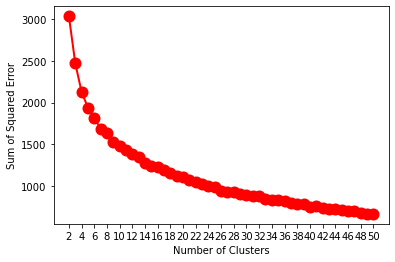

In [21]:
#plot of sum of squared error with respect to the number of clusters
plt.scatter(range(2, max_clust+1), ss_errors, s=100, c="red", linewidth=2, linestyle='-')
plt.plot(range(2, max_clust+1), ss_errors, c="red", linewidth=2)
plt.xticks(range(2, max_clust+1, 2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()


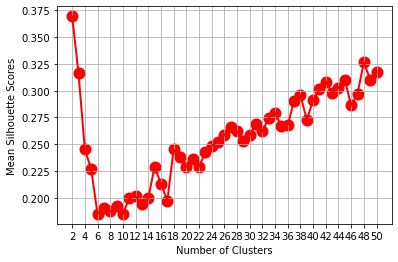

In [22]:
#plot of silhouettes with respect to the number of clusters
plt.scatter(range(2, max_clust+1), silhouettes_kmeans, s=100, c="red", linewidth=2, linestyle='-')
plt.plot(range(2, max_clust+1), silhouettes_kmeans, c="red", linewidth=2)
plt.xticks(range(2, max_clust+1, 2))
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Silhouette Scores")
plt.grid()
plt.show()

In [24]:
#kmeans with kmeans++
max_clust = 20
ss_errors2 = np.zeros(max_clust-1)
silhouettes_kmeans2 = np.zeros(max_clust-1)
for i in range(2, max_clust+1):
    #Sum of squared distances of samples to their closest cluster center.
    kmeans = KMeans(n_clusters=i, max_iter = 25, init = 'k-means++', 
                n_init = i, verbose=1) #k-means object is created

    labels = kmeans.fit_predict(cluster_df)
    ss_errors2[i-2] = kmeans.inertia_
    silhouettes_kmeans2[i-2] = silhouette_score(cluster_df, labels, metric='euclidean')

Initialization complete
Iteration 0, inertia 5501.630344099779
Iteration 1, inertia 3210.41006024423
Iteration 2, inertia 3098.370772264276
Iteration 3, inertia 3061.410719828943
Iteration 4, inertia 3044.873659553752
Iteration 5, inertia 3040.610799565552
Iteration 6, inertia 3038.7823421687
Iteration 7, inertia 3038.345783017632
Iteration 8, inertia 3038.2982524494755
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 4673.187033435409
Iteration 1, inertia 3088.4920173249525
Iteration 2, inertia 3054.9807260231864
Iteration 3, inertia 3045.4321515038255
Iteration 4, inertia 3041.92702709977
Iteration 5, inertia 3037.528402989465
Iteration 6, inertia 3035.005813017385
Iteration 7, inertia 3034.1703532184565
Iteration 8, inertia 3034.0831028656066
Iteration 9, inertia 3034.028511145198
Iteration 10, inertia 3034.0036534430237
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 3822.174197794227
Iteration 1,

Iteration 9, inertia 1688.0889061639675
Iteration 10, inertia 1687.1135378635877
Iteration 11, inertia 1686.8700096189962
Iteration 12, inertia 1686.7653455684845
Iteration 13, inertia 1686.667779769852
Iteration 14, inertia 1686.593114849685
Iteration 15, inertia 1686.4238758578758
Iteration 16, inertia 1686.3001442648117
Iteration 17, inertia 1686.2594790443557
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 2541.166204226872
Iteration 1, inertia 1894.3905881437222
Iteration 2, inertia 1816.9008872195902
Iteration 3, inertia 1775.7389509268717
Iteration 4, inertia 1747.5588531717424
Iteration 5, inertia 1726.3781196672608
Iteration 6, inertia 1706.2964471505022
Iteration 7, inertia 1696.8610318183535
Iteration 8, inertia 1696.4851946025608
Iteration 9, inertia 1696.3438013952532
Iteration 10, inertia 1696.0191926236737
Iteration 11, inertia 1695.696993398304
Iteration 12, inertia 1695.2586703168115
Iteration 13, inertia 1694.8898427724712
I

Iteration 21, inertia 1591.0206889994424
Iteration 22, inertia 1590.9615018618265
Iteration 23, inertia 1590.7349515714511
Iteration 24, inertia 1590.4030496209505
Initialization complete
Iteration 0, inertia 2300.3124474937945
Iteration 1, inertia 1649.9251558738813
Iteration 2, inertia 1568.6643477042003
Iteration 3, inertia 1548.1004350513365
Iteration 4, inertia 1531.666529958764
Iteration 5, inertia 1517.926350736918
Iteration 6, inertia 1510.2829446500255
Iteration 7, inertia 1507.766158960723
Iteration 8, inertia 1505.7918103903305
Iteration 9, inertia 1504.9974084809633
Iteration 10, inertia 1504.7519077475229
Iteration 11, inertia 1504.4096457453707
Iteration 12, inertia 1504.0947150726836
Iteration 13, inertia 1503.7880386914776
Iteration 14, inertia 1503.747501822736
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2427.854206812324
Iteration 1, inertia 1640.527651951053
Iteration 2, inertia 1551.5157419191921
Iteration 3, inertia 1

Iteration 0, inertia 2115.316832587811
Iteration 1, inertia 1605.0168215623178
Iteration 2, inertia 1510.909562615311
Iteration 3, inertia 1470.590969487125
Iteration 4, inertia 1454.9842412478151
Iteration 5, inertia 1432.0281096563747
Iteration 6, inertia 1410.388132511034
Iteration 7, inertia 1401.7512983904523
Iteration 8, inertia 1399.1895196702797
Iteration 9, inertia 1397.9796068580843
Iteration 10, inertia 1397.850141205417
Iteration 11, inertia 1397.8061974756406
Iteration 12, inertia 1397.7765754982042
Iteration 13, inertia 1397.6710593121181
Iteration 14, inertia 1397.5734499483967
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 2059.714096538542
Iteration 1, inertia 1575.4057135580672
Iteration 2, inertia 1529.7318616133875
Iteration 3, inertia 1506.658246041639
Iteration 4, inertia 1498.3282057929512
Iteration 5, inertia 1493.3998589112143
Iteration 6, inertia 1489.499079210801
Iteration 7, inertia 1481.0181911268799
Iteration 8,

Iteration 17, inertia 1394.8835187853695
Iteration 18, inertia 1394.6932696753647
Iteration 19, inertia 1394.5499448827502
Iteration 20, inertia 1394.5227606690098
Iteration 21, inertia 1394.4521156445169
Iteration 22, inertia 1394.3644244771206
Iteration 23, inertia 1394.194922249829
Iteration 24, inertia 1394.0071056570212
Initialization complete
Iteration 0, inertia 2074.677101932732
Iteration 1, inertia 1510.6203437610418
Iteration 2, inertia 1445.2993364662943
Iteration 3, inertia 1417.911528112418
Iteration 4, inertia 1414.4479102733178
Iteration 5, inertia 1413.3108087296887
Iteration 6, inertia 1412.2537638854285
Iteration 7, inertia 1411.3369349638376
Iteration 8, inertia 1410.8665243131213
Iteration 9, inertia 1410.6952133348052
Iteration 10, inertia 1410.6185711005523
Iteration 11, inertia 1410.5859293038275
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1997.5817738856426
Iteration 1, inertia 1473.819691565897
Iteration 2, inerti

Iteration 15, inertia 1301.2246284959872
Iteration 16, inertia 1301.1933813286544
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 1927.096304017028
Iteration 1, inertia 1441.5453546510919
Iteration 2, inertia 1369.2400980551374
Iteration 3, inertia 1334.046782324625
Iteration 4, inertia 1314.6462937090603
Iteration 5, inertia 1300.562824309246
Iteration 6, inertia 1292.237133046227
Iteration 7, inertia 1286.8785793334798
Iteration 8, inertia 1284.3056557833145
Iteration 9, inertia 1283.023908339888
Iteration 10, inertia 1282.7235858040822
Iteration 11, inertia 1282.6604650114434
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1995.7848647710498
Iteration 1, inertia 1491.3171270109476
Iteration 2, inertia 1421.9982705111909
Iteration 3, inertia 1397.4689084594486
Iteration 4, inertia 1375.213945405302
Iteration 5, inertia 1340.5764202288092
Iteration 6, inertia 1328.9283790773484
Iteration 7, inertia

Iteration 1, inertia 1400.2170188298642
Iteration 2, inertia 1317.0485870103714
Iteration 3, inertia 1296.0688930523556
Iteration 4, inertia 1280.3112947528418
Iteration 5, inertia 1267.5121099647486
Iteration 6, inertia 1256.461205990682
Iteration 7, inertia 1242.1116123350419
Iteration 8, inertia 1234.7909349347935
Iteration 9, inertia 1230.3336470487152
Iteration 10, inertia 1229.6883383867505
Iteration 11, inertia 1229.3872422754496
Iteration 12, inertia 1229.3641240358465
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1934.5458759028718
Iteration 1, inertia 1410.7229786482849
Iteration 2, inertia 1350.9363243743664
Iteration 3, inertia 1329.9388854262186
Iteration 4, inertia 1314.7905375927
Iteration 5, inertia 1306.4918426326485
Iteration 6, inertia 1302.7022016563833
Iteration 7, inertia 1299.5130451988975
Iteration 8, inertia 1295.2671926725934
Iteration 9, inertia 1291.5570388243161
Iteration 10, inertia 1290.1498500954553
Iteration

Iteration 1, inertia 1325.604878679531
Iteration 2, inertia 1264.9381043036485
Iteration 3, inertia 1244.1722455967285
Iteration 4, inertia 1234.637799210728
Iteration 5, inertia 1231.392691928849
Iteration 6, inertia 1225.4246790960406
Iteration 7, inertia 1219.2642989156816
Iteration 8, inertia 1215.1038920261842
Iteration 9, inertia 1212.9453415909647
Iteration 10, inertia 1212.01612788314
Iteration 11, inertia 1211.1765247222818
Iteration 12, inertia 1211.0916851138154
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 1749.7213902305377
Iteration 1, inertia 1323.0028845393012
Iteration 2, inertia 1276.2548688883219
Iteration 3, inertia 1257.471656285763
Iteration 4, inertia 1243.2455230719202
Iteration 5, inertia 1237.44819341533
Iteration 6, inertia 1220.2633349472192
Iteration 7, inertia 1214.005557553391
Iteration 8, inertia 1212.9601942623783
Iteration 9, inertia 1211.4042980238673
Iteration 10, inertia 1209.3718786090137
Iteration 11, 

Iteration 4, inertia 1190.371662299572
Iteration 5, inertia 1185.4989416420658
Iteration 6, inertia 1179.9109714269025
Iteration 7, inertia 1176.9183057659195
Iteration 8, inertia 1175.6766733584932
Iteration 9, inertia 1174.4751045198427
Iteration 10, inertia 1173.4204345590513
Iteration 11, inertia 1173.0708488492965
Iteration 12, inertia 1172.8703956631166
Iteration 13, inertia 1172.7924786468743
Iteration 14, inertia 1172.6399292062388
Iteration 15, inertia 1172.2787612114812
Iteration 16, inertia 1171.6091786861687
Iteration 17, inertia 1170.9822404230654
Iteration 18, inertia 1170.0119558985798
Iteration 19, inertia 1168.361060312828
Iteration 20, inertia 1165.753672699975
Iteration 21, inertia 1163.9025156697828
Iteration 22, inertia 1163.2597659980033
Iteration 23, inertia 1163.0968652705733
Iteration 24, inertia 1162.7231294242947
Initialization complete
Iteration 0, inertia 1774.180151814125
Iteration 1, inertia 1271.2139752802418
Iteration 2, inertia 1227.0429590641543
Itera

Iteration 0, inertia 1790.241832341269
Iteration 1, inertia 1244.6667657691607
Iteration 2, inertia 1165.6327149597726
Iteration 3, inertia 1134.6543143890258
Iteration 4, inertia 1113.4948072639152
Iteration 5, inertia 1107.6499669277405
Iteration 6, inertia 1106.6109135738088
Iteration 7, inertia 1105.9904879036071
Iteration 8, inertia 1105.6985087623316
Iteration 9, inertia 1105.6253414141088
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1723.244393730005
Iteration 1, inertia 1219.0504151438608
Iteration 2, inertia 1160.8220429777034
Iteration 3, inertia 1143.2812308810192
Iteration 4, inertia 1132.4935456106293
Iteration 5, inertia 1126.3983403383656
Iteration 6, inertia 1119.2681628020446
Iteration 7, inertia 1112.4598127511995
Iteration 8, inertia 1108.1632490689829
Iteration 9, inertia 1106.6926219995407
Iteration 10, inertia 1105.9031935058395
Iteration 11, inertia 1105.3834797101047
Iteration 12, inertia 1104.5728875251896
Iteration

Iteration 0, inertia 1590.337438491331
Iteration 1, inertia 1193.5045437522047
Iteration 2, inertia 1154.2602378374718
Iteration 3, inertia 1134.1462016790265
Iteration 4, inertia 1118.1309165082946
Iteration 5, inertia 1109.0653203035852
Iteration 6, inertia 1105.517135247932
Iteration 7, inertia 1103.8095924975203
Iteration 8, inertia 1103.2488593413461
Iteration 9, inertia 1103.1586396724688
Iteration 10, inertia 1103.1158390701412
Iteration 11, inertia 1103.0357333258848
Iteration 12, inertia 1103.0013244297372
Iteration 13, inertia 1102.990809693564
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 1705.8498627079023
Iteration 1, inertia 1251.0108211383126
Iteration 2, inertia 1185.3149613930561
Iteration 3, inertia 1155.8781526583589
Iteration 4, inertia 1124.648354715385
Iteration 5, inertia 1110.105088379604
Iteration 6, inertia 1103.4843030115078
Iteration 7, inertia 1099.5081022476825
Iteration 8, inertia 1097.2673423471592
Iteration 

Iteration 0, inertia 1659.0159381155977
Iteration 1, inertia 1191.8990256938787
Iteration 2, inertia 1149.0162916630159
Iteration 3, inertia 1135.019972274313
Iteration 4, inertia 1125.7646204197224
Iteration 5, inertia 1120.6824189722847
Iteration 6, inertia 1117.8296389761708
Iteration 7, inertia 1114.5573114506792
Iteration 8, inertia 1112.4484284554533
Iteration 9, inertia 1109.2644845164725
Iteration 10, inertia 1106.6667741147705
Iteration 11, inertia 1106.1097163037734
Iteration 12, inertia 1105.6494171524057
Iteration 13, inertia 1104.728666757974
Iteration 14, inertia 1104.2188214933494
Iteration 15, inertia 1103.9850787504884
Iteration 16, inertia 1103.8796682067941
Iteration 17, inertia 1103.8576881433482
Converged at iteration 17: strict convergence.


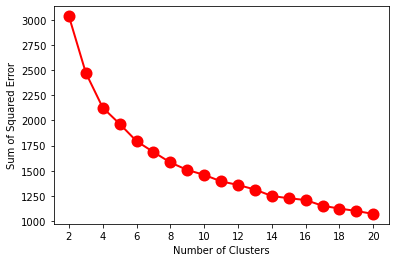

In [25]:
#plot of sum of squared error with respect to the number of clusters
plt.scatter(range(2, max_clust+1), ss_errors2, s=100, c="red", linewidth=2, linestyle='-')
plt.plot(range(2, max_clust+1), ss_errors2, c="red", linewidth=2)
plt.xticks(range(2, max_clust+1, 2))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

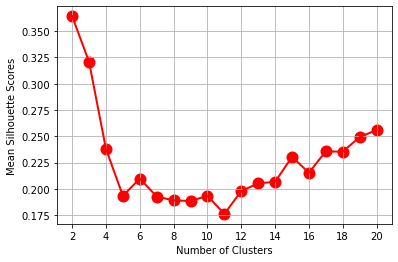

In [26]:
#plot of silhouettes with respect to the number of clusters
plt.scatter(range(2, max_clust+1), silhouettes_kmeans2, s=100, c="red", linewidth=2, linestyle='-')
plt.plot(range(2, max_clust+1), silhouettes_kmeans2, c="red", linewidth=2)
plt.xticks(range(2, max_clust+1, 2))
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Silhouette Scores")
plt.grid()
plt.show()